<a href="https://colab.research.google.com/github/22F3000107/22f300107.github.io/blob/main/Copy_of_22f3000107_notebook_t12025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

system_threat_forecaster_path = kagglehub.competition_download('System-Threat-Forecaster')

print('Data source import complete.')




# IMPORTING THE NECESSARY PACKAGES

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#  DATA LOADING

In [ ]:
train_df =pd.read_csv("/kaggle/input/System-Threat-Forecaster/train.csv")

In [ ]:
test_df = pd.read_csv("/kaggle/input/System-Threat-Forecaster/test.csv")

In [ ]:
train_df.head()

,MachineID,ProductName,EngineVersion,AppVersion,SignatureVersion,IsBetaUser,RealTimeProtectionState,IsPassiveModeEnabled,AntivirusConfigID,NumAntivirusProductsInstalled,...,IsSecureBootEnabled,IsVirtualDevice,IsTouchEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer,RegionIdentifier,DateAS,DateOS,target
0,f541bae429089117c4aac39c90dd3416,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1003.0,0,7.0,0,53447.0,1.0,...,0,0.0,1,0,1.0,0.0,6.0,2018-09-10 10:11:00,2018-04-17,0
1,dc2b14d9ce3a0ce4050bb640190f2ca5,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1465.0,0,7.0,0,53447.0,1.0,...,1,0.0,0,0,0.0,0.0,10.0,2018-08-16 00:01:00,2018-08-14,1
2,fd20c5f010e9c5f91ad1c6b3e0da68a0,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1546.0,0,7.0,0,53447.0,1.0,...,0,0.0,0,0,0.0,1.0,6.0,2018-09-20 23:20:00,2018-09-11,1
3,38711eae85eb77a72ec5dfdf27eb2a76,win8defender,1.1.15200.1,4.12.17007.18011,1.275.1141.0,0,7.0,0,46413.0,2.0,...,1,0.0,0,0,0.0,0.0,12.0,2018-09-14 00:32:00,2018-01-03,1
4,32607c9a543a9214e2c7e45800ed4849,win8defender,1.1.15200.1,4.13.17134.228,1.275.1283.0,0,7.0,0,40466.0,2.0,...,0,0.0,0,0,0.0,1.0,7.0,2018-09-15 19:34:00,2018-09-11,0


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 76 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   MachineID                           100000 non-null  object 
 1   ProductName                         100000 non-null  object 
 2   EngineVersion                       100000 non-null  object 
 3   AppVersion                          100000 non-null  object 
 4   SignatureVersion                    100000 non-null  object 
 5   IsBetaUser                          100000 non-null  int64  
 6   RealTimeProtectionState             99934 non-null   float64
 7   IsPassiveModeEnabled                100000 non-null  int64  
 8   AntivirusConfigID                   99924 non-null   float64
 9   NumAntivirusProductsInstalled       99924 non-null   float64
 10  NumAntivirusProductsEnabled         99924 non-null   float64
 11  HasTpm                     

# EXPLOARTRY DATA ANALAYSIS(EDA)

In [ ]:
train_df.shape

(100000, 76)

In [ ]:
train_df.describe()

,IsBetaUser,RealTimeProtectionState,IsPassiveModeEnabled,AntivirusConfigID,NumAntivirusProductsInstalled,NumAntivirusProductsEnabled,HasTpm,CountryID,CityID,GeoRegionID,...,FirmwareManufacturerID,FirmwareVersionID,IsSecureBootEnabled,IsVirtualDevice,IsTouchEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer,RegionIdentifier,target
count,100000.0,99934.000000,100000.000000,99924.000000,99924.000000,99924.000000,100000.000000,100000.000000,99377.000000,100000.000000,...,99624.000000,99666.000000,100000.000000,99980.000000,100000.000000,100000.000000,99866.000000,99441.000000,99441.000000,100000.000000
mean,0.0,6.848430,0.017620,47975.710440,1.326528,1.018264,0.996780,108.078790,81029.938587,169.741630,...,401.987613,32942.648044,0.495690,0.003841,0.128470,0.040580,0.058398,0.296668,7.875866,0.505250
std,0.0,1.015166,0.131566,13803.321533,0.520681,0.155291,0.056654,63.062151,48944.027074,89.188929,...,221.318891,21151.970827,0.499984,0.061855,0.334614,0.197316,0.234496,0.456791,4.562533,0.499975
min,0.0,0.000000,0.000000,39.000000,1.000000,0.000000,0.000000,1.000000,7.000000,1.000000,...,2.000000,121.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.0,7.000000,0.000000,49480.000000,1.000000,1.000000,1.000000,51.000000,36694.000000,89.000000,...,142.000000,13020.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000
50%,0.0,7.000000,0.000000,53447.000000,1.000000,1.000000,1.000000,97.000000,82373.000000,181.000000,...,500.000000,33066.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,1.000000
75%,0.0,7.000000,0.000000,53447.000000,2.000000,1.000000,1.000000,162.000000,122835.000000,267.000000,...,556.000000,52357.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,1.000000
max,0.0,8.000000,1.000000,70490.000000,5.000000,4.000000,1.000000,222.000000,167957.000000,296.000000,...,1083.000000,72091.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.000000,1.000000


In [ ]:
train_df.columns

Index(['MachineID', 'ProductName', 'EngineVersion', 'AppVersion',
       'SignatureVersion', 'IsBetaUser', 'RealTimeProtectionState',
       'IsPassiveModeEnabled', 'AntivirusConfigID',
       'NumAntivirusProductsInstalled', 'NumAntivirusProductsEnabled',
       'HasTpm', 'CountryID', 'CityID', 'GeoRegionID', 'LocaleEnglishNameID',
       'PlatformType', 'Processor', 'OSVersion', 'OSBuildNumber',
       'OSProductSuite', 'OsPlatformSubRelease', 'OSBuildLab',
       'SKUEditionName', 'IsSystemProtected', 'AutoSampleSubmissionEnabled',
       'SMode', 'IEVersionID', 'FirewallEnabled', 'EnableLUA',
       'MDC2FormFactor', 'DeviceFamily', 'OEMNameID', 'OEMModelID',
       'ProcessorCoreCount', 'ProcessorManufacturerID', 'ProcessorModelID',
       'PrimaryDiskCapacityMB', 'PrimaryDiskType', 'SystemVolumeCapacityMB',
       'HasOpticalDiskDrive', 'TotalPhysicalRAMMB', 'ChassisType',
       'PrimaryDisplayDiagonalInches', 'PrimaryDisplayResolutionHorizontal',
       'PrimaryDisplayResolutio

In [ ]:
train_df.isnull().sum()

MachineID             0
ProductName           0
EngineVersion         0
AppVersion            0
SignatureVersion      0
                   ... 
IsGamer             559
RegionIdentifier    559
DateAS                0
DateOS               24
target                0
Length: 76, dtype: int64

In [ ]:
train_df['target'].value_counts()

target
1    50525
0    49475
Name: count, dtype: int64

In [ ]:
numerical_cols = train_df.select_dtypes(include=['int64','float64']).columns
categorical_cols = train_df.select_dtypes(include=['object']).columns


print("Dataset Shape:",train_df.shape)
print("Feature Types:")
print(train_df.dtypes)

Dataset Shape: (100000, 76)
Feature Types:
MachineID            object
ProductName          object
EngineVersion        object
AppVersion           object
SignatureVersion     object
                     ...   
IsGamer             float64
RegionIdentifier    float64
DateAS               object
DateOS               object
target                int64
Length: 76, dtype: object


# DATA VISUALIZATION

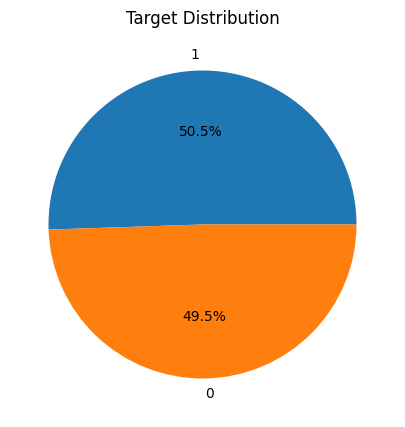

In [ ]:
plt.figure(figsize=(8,5))
target_dist = train_df['target'].value_counts()
plt.pie(target_dist, labels=target_dist.index,autopct='%1.1f%%')
plt.title('Target Distribution')
plt.show()

**# UNDERSTANDING THE TARGET  DISTRIBUTION**

 * The pie chart, titled "Target Distribution," reveals an almost balanced distribution between the two categories.

* More than 50% of the machines have malware detected (1), represented by the blue section.
* Less than 50% of the machines have no malware detected (0), represented by the orange section.
  


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


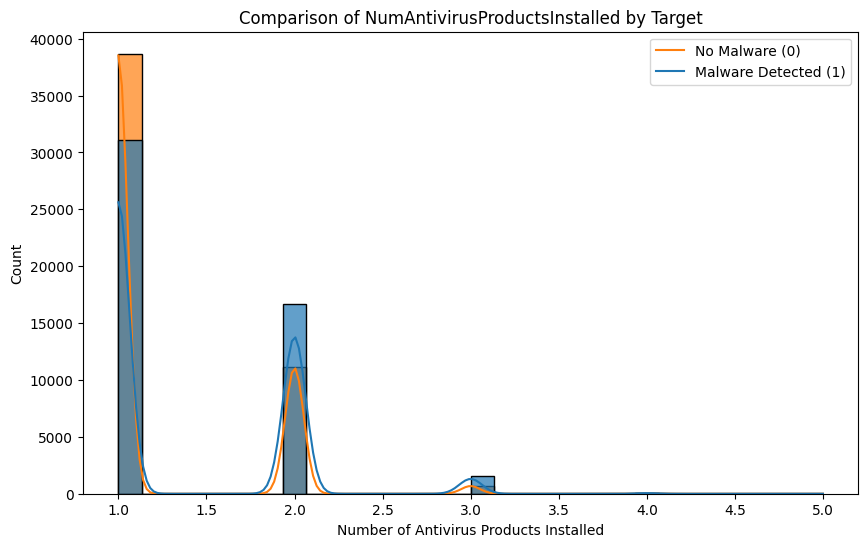

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data=train_df, x='NumAntivirusProductsInstalled', hue='target', bins=30, kde=True, alpha=0.7)

plt.title("Comparison of NumAntivirusProductsInstalled by Target")
plt.xlabel("Number of Antivirus Products Installed")
plt.ylabel("Count")
plt.legend(["No Malware (0)", "Malware Detected (1)"])
plt.show()


# Compares the distribution of the number of antivirus products installed across two groups:
1. No Malware (0) – Systems where malware was not detected
2. Malware Detected (1) – Systems where malware was found



**Numericals columns**

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


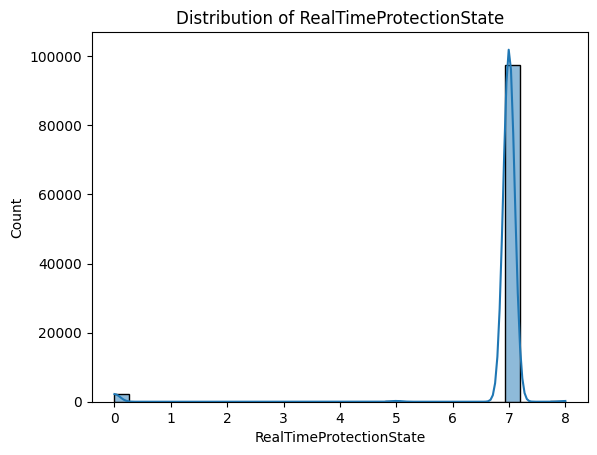

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


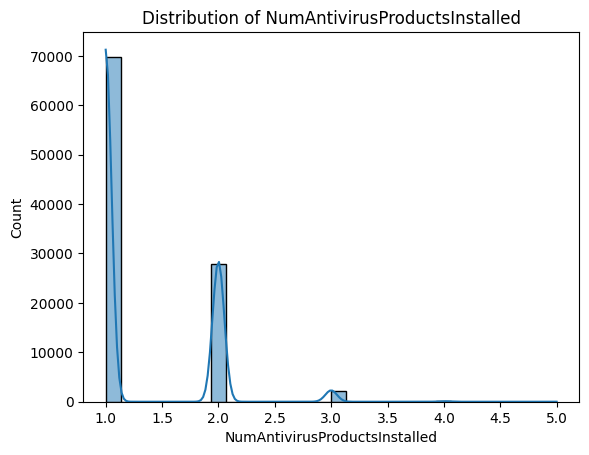

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


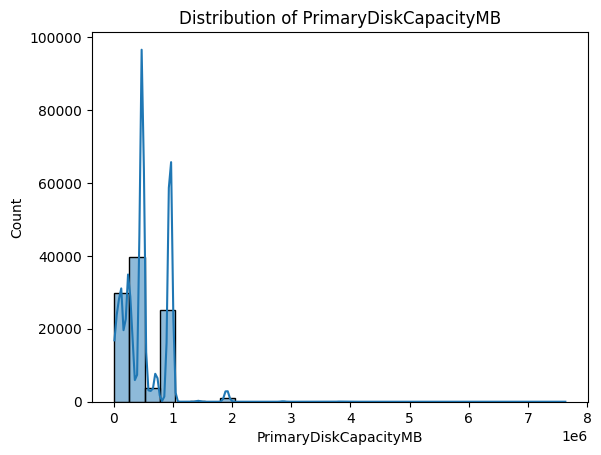

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


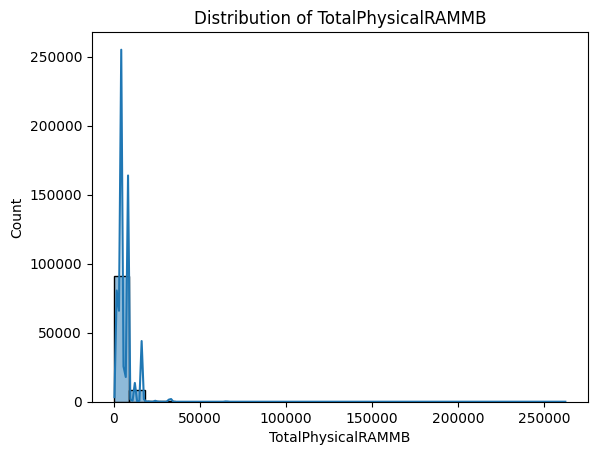

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


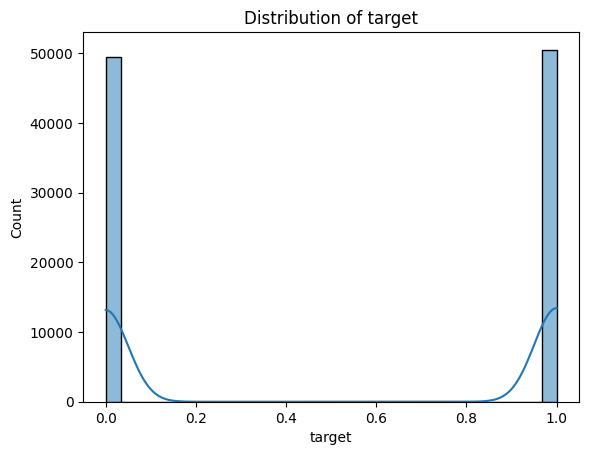

In [ ]:
numerical_columns = ['RealTimeProtectionState', 'NumAntivirusProductsInstalled', 'PrimaryDiskCapacityMB', 'TotalPhysicalRAMMB', 'target']
for col in numerical_columns:
    sns.histplot(data=train_df, x=col, kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()


# Understanding these Histograms:

This loop plots histograms for each numerical column in train_df, showing the distribution of values for:

* RealTimeProtectionState
* NumAntivirusProductsInstalled
* PrimaryDiskCapacityMB
* TotalPhysicalRAMMB
* target



1. RealTimeProtectionState:
   The values are mostly concentrated around 0 or 1, this represents a binary feature (e.g., real-time protection enabled or disabled).
   
2. NumAntivirusProductsInstalled:
   This feature is right-skewed (values mostly small but a long tail), it means most systems have only a few antivirus products installed.

3. PrimaryDiskCapacityMB:
   The distribution is bimodal (two peaks), it suggests that machines typically fall into two common storage sizes.

4. TotalPhysicalRAMMB:
A normally distributed curve suggests a balanced distribution of RAM across machines.
A long tail on the right indicates that while most machines have lower RAM, some high-end systems have significantly more.


5. Target:
The target is binary (0 or 1), a histogram will simply show the proportion of malware-infected vs. non-infected machines.


# **Count of Target by Platform Type**

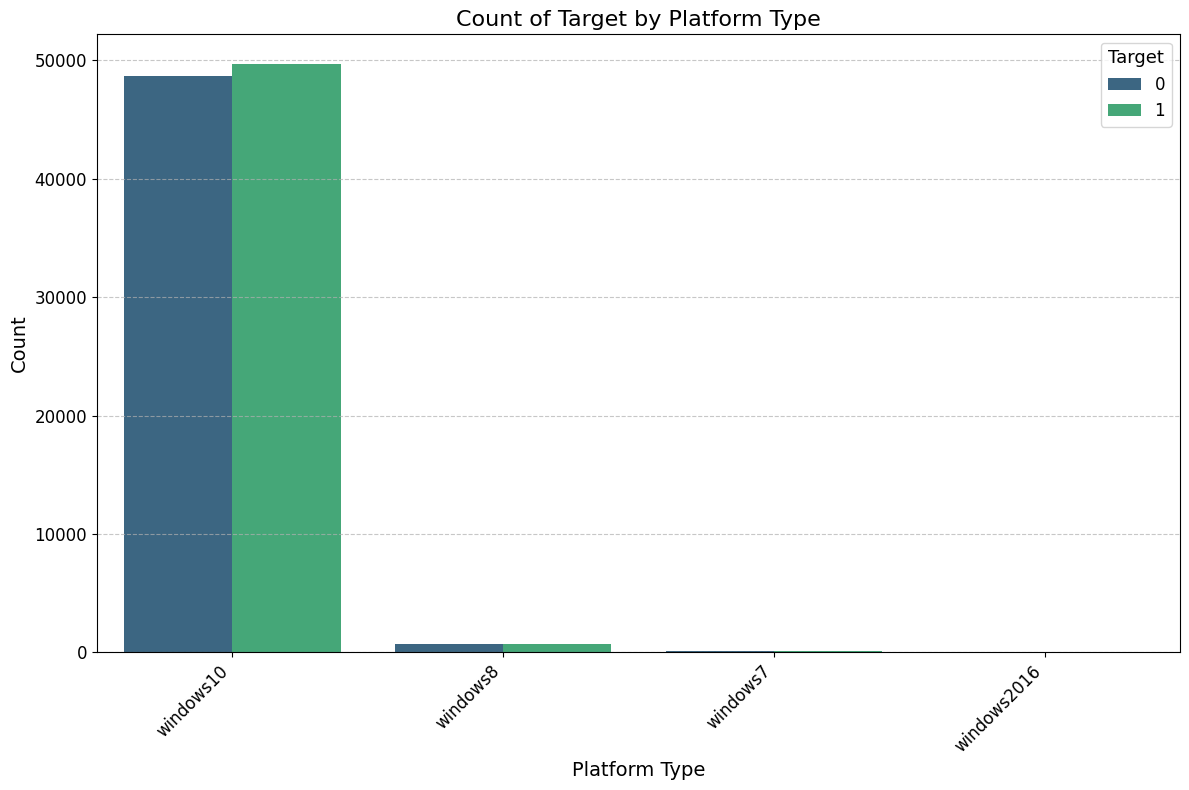

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(x='PlatformType', hue='target', data=train_df, palette='viridis')

plt.xlabel('Platform Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Count of Target by Platform Type', fontsize=16)
plt.legend(title='Target', title_fontsize='13', fontsize='12')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


**This count plot helps us understand the relationship between Platform Type and the Target (Malware Detection: 0 or 1). Here’s what we analyzed from it:**

* Distribution of Platform Types:
The x-axis represents different platform types like windows10, windows8, windows7,windows2016.
The y-axis shows the count of machines for each platform.

* Malware Presence per Platform:
The hue (target) differentiates between systems with malware (1) and without malware (0) using different colors.
By comparing the heights of bars within each platform type, we can see that our Windows 10 devices show a nearly equal distribution of malware and non-malware cases.

* Windows 8 systems also exhibit an equal number of infected and clean devices and this implies that either Windows 8 has similar security measures across devices or that malware spreads uniformly among its users.

* Since Windows 10 and Windows 8 have almost equal numbers of infected and non-infected systems, we can refine our insights:

* Malware does not seem to target a specific platform disproportionately—it spreads fairly evenly.
The equal malware distribution suggests that security measures might be consistent across platforms or that other features (e.g., installed software, user behavior, or network activity) play a crucial role in infection rates.


**BOXPLOT(OUTLIERS)**


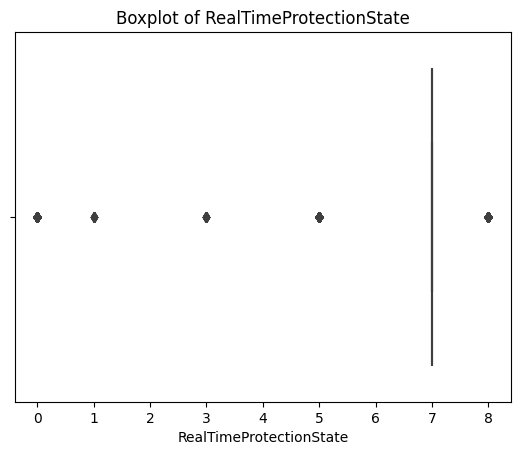

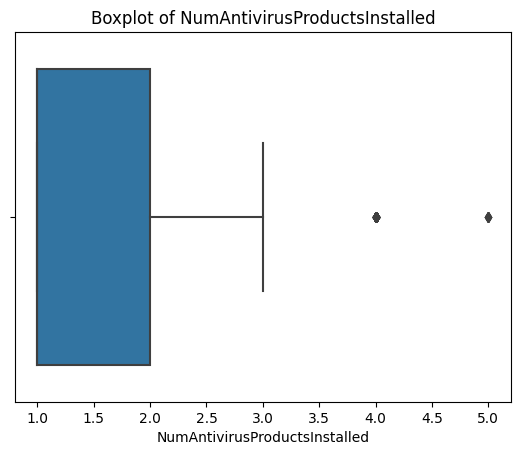

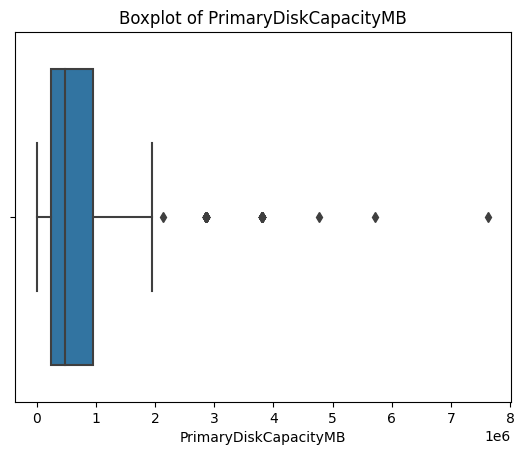

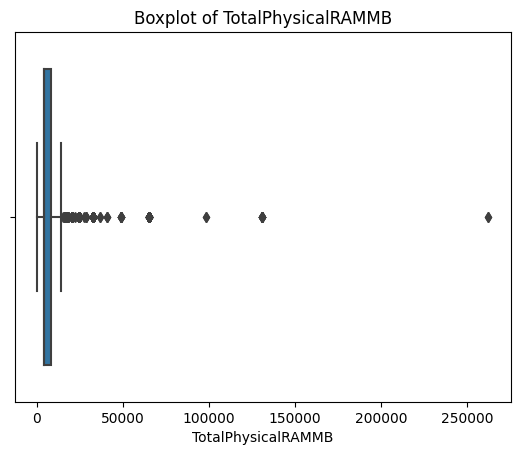

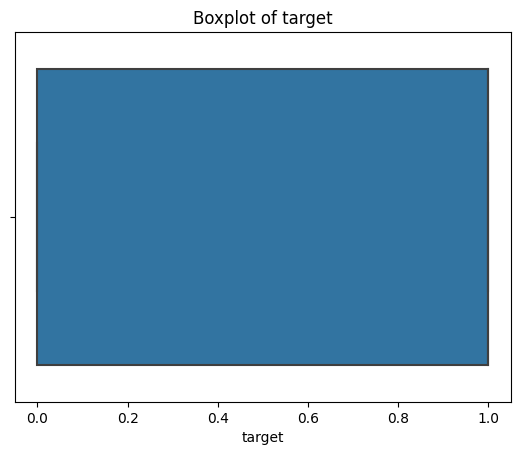

In [ ]:
for col in numerical_columns:
    sns.boxplot(data=train_df, x=col)
    plt.title(f'Boxplot of {col}')
    plt.show()


**Understanding the Boxplot**

* Boxplot for NumAntivirusProductsInstalled: This boxplot provides insights into the distribution of the number of antivirus products   installed on the systems.

  1.Median & Interquartile Range (IQR):
  

     The median (central line inside the box) is around 1 or 2, indicating that most systems have 1-2 antivirus products installed.
     The IQR (box) spans from 1 to 2, meaning 50% of systems have between 1 and 2 antivirus programs.

  2.Whiskers & Outliers:


     The right whisker extends up to 3 antivirus products.
     Beyond this, we see outliers at 4 and 5 antivirus products, suggesting that only a few systems have such a high number.
  
  3.Skewness & Distribution:

     The boxplot appears right-skewed since outliers are only on the higher end.
     This suggests that while most systems have 1-2 antivirus products, a small number have 4-5 antivirus products, which is unusual.
   
* Boxplots for PrimaryDiskCapacityMB, TotalPhysicalRAMMB, and Target

  1 . PrimaryDiskCapacityMB (Top Boxplot)
     
     The median disk capacity is relatively low.
     and the IQR (box) is narrow, meaning most values are concentrated in a small range.
     There are many outliers on the higher end, indicating a few systems with very large storage capacities.
     This suggests skewness, where a small number of computers have significantly larger disk sizes.


  2 .TotalPhysicalRAMMB (Middle Boxplot)
     Similar to disk capacity, RAM distribution is heavily right-skewed.
     Most computers have lower RAM, while a few have extremely high values (outliers).
     The box is narrow, meaning most systems have similar RAM sizes.

  3 . Target Variable (Bottom Boxplot)
     This boxplot is not meaningful, as the target is binary (0 or 1) and
     this boxplot just visualizes the count of both classes.


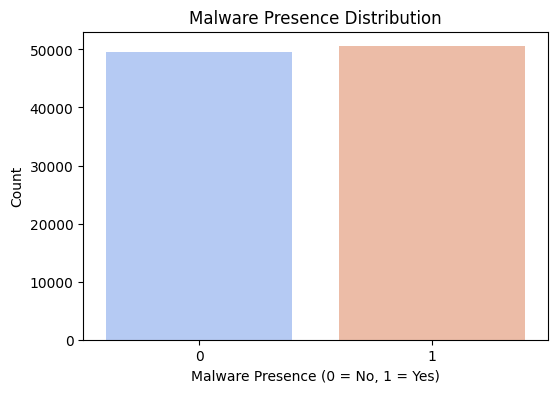

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x=train_df["target"], palette="coolwarm")
plt.title("Malware Presence Distribution")
plt.xlabel("Malware Presence (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

**HEATMAP**

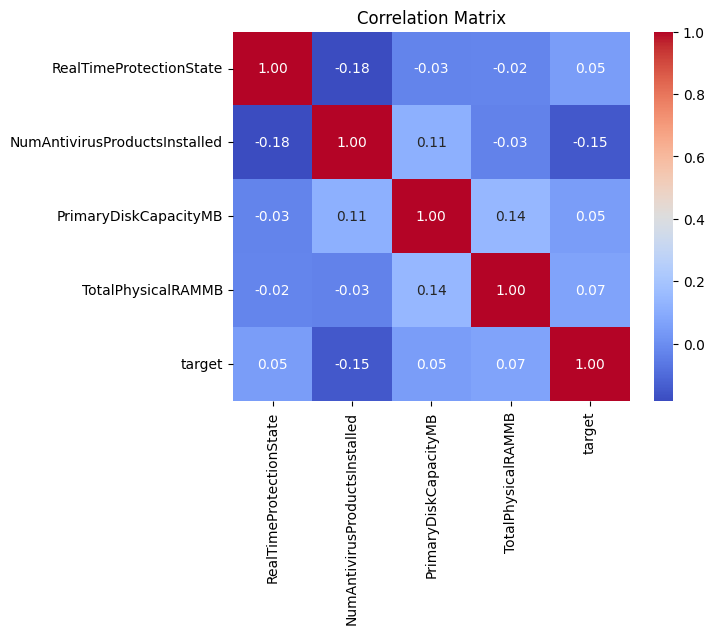

In [ ]:
corr_matrix = train_df[numerical_columns].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


**Understanding the Coorelation Matrix:**
 correlation heatmap will show the relationships between numerical features in our dataset.


1. Correlation with Target Variable

   NumAntivirusProductsInstalled (-0.15):
   This is the most negatively correlated feature with the target, but the correlation is weak.
   
   TotalPhysicalRAMMB (0.07):
   Weak positive correlation with the target.
   
   PrimaryDiskCapacityMB (0.05):
   Also weakly correlated with the target.
   
   RealTimeProtectionState (0.05):
   Almost no correlation with the target.

   
2. Feature-Feature Correlations

   
   NumAntivirusProductsInstalled & RealTimeProtectionState (-0.18):
   Slight negative correlation, but not significant.

   PrimaryDiskCapacityMB & TotalPhysicalRAMMB (0.14):
   Slight positive correlation, but not strong enough to indicate redundancy.


**CATEGORICAL COLUMNS**

BAR CHART

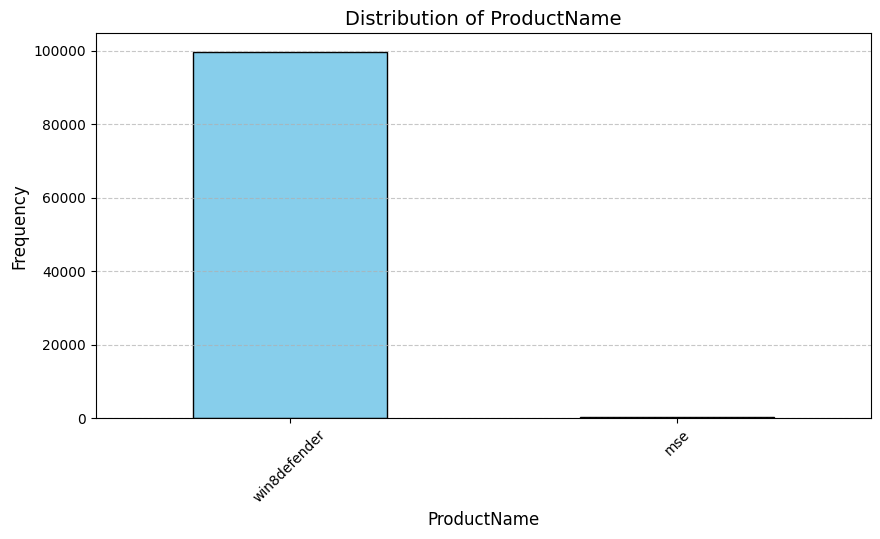

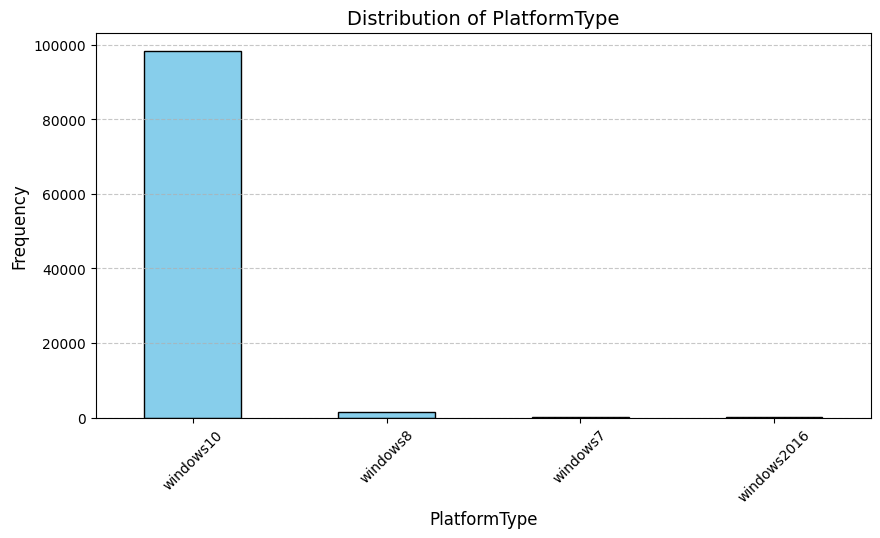

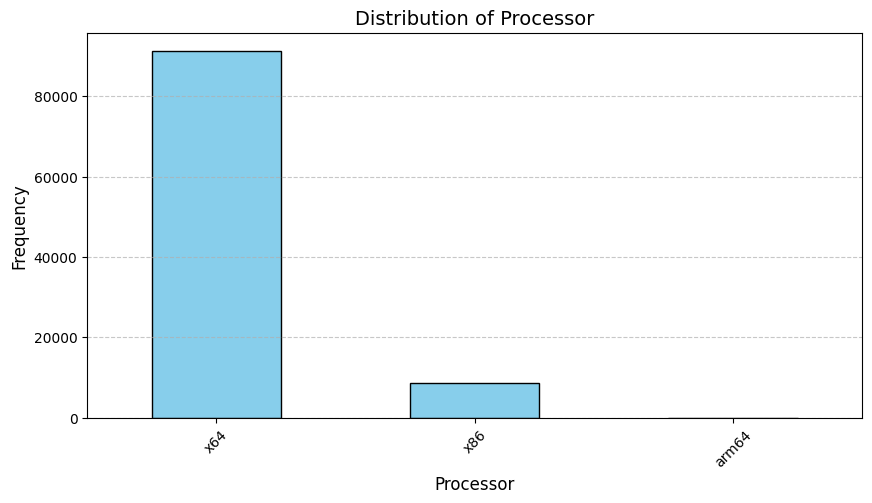

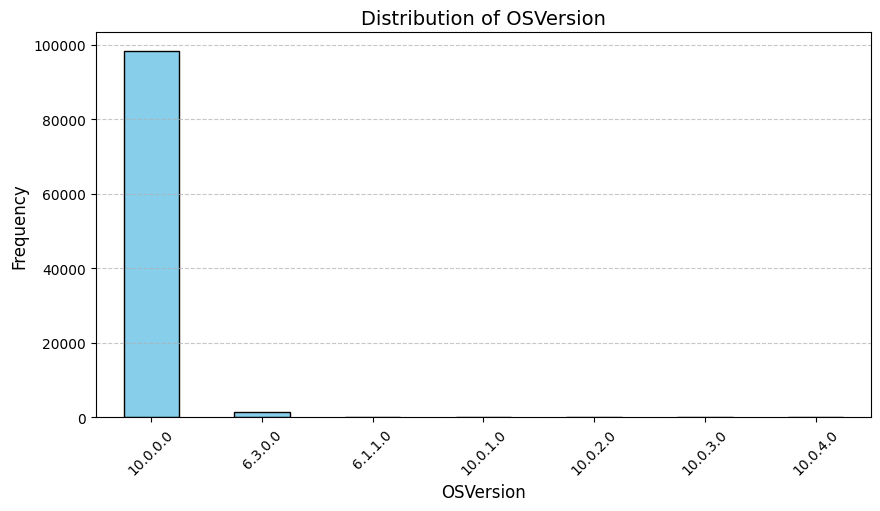

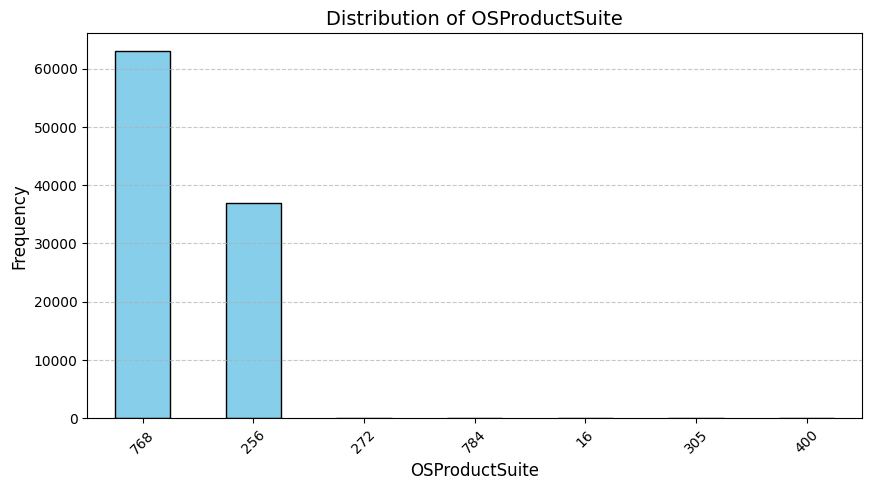

In [ ]:
categorical_columns = ['ProductName', 'PlatformType', 'Processor', 'OSVersion', 'OSProductSuite']

for col in categorical_columns:
    plt.figure(figsize=(10, 5))
    train_df[col].value_counts().head(10).plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.ylabel('Frequency', fontsize=12)
    plt.xlabel(col, fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


**Understanding Categorical Feature Distributions**
  The bar plots reveal significant class imbalances across categorical features, which can impact model performance.



  1. ProductName:
    Dominated by "windowsdefender", with other values appearing rarely and
    this feature has very low variability and may not provide much predictive value.


  2. PlatformType:
    "Windows10" is overwhelmingly the most common category, with a few observations for "Windows8", "Windows7", and
    "Windows2016" and also Low variance, and many categories have very few occurrences.


  3. Processor:
     "x64" is the dominant processor type, followed by "x86" and "other".
      Since most machines are x64, this feature might not be informative unless "x86" or "other" correlate with different security risks.


  4. OSVersion:
    "10.0.0" is overwhelmingly common, followed by rare occurrences of "8.3.0", "6.1.1.0", etc.
     Low variance, with rare OS versions having little impact on the model.


  5. OSProductSuite:
      The most common values are "768" and "256", but these are numeric and may not be directly interpretable.


**StackedBarChart**

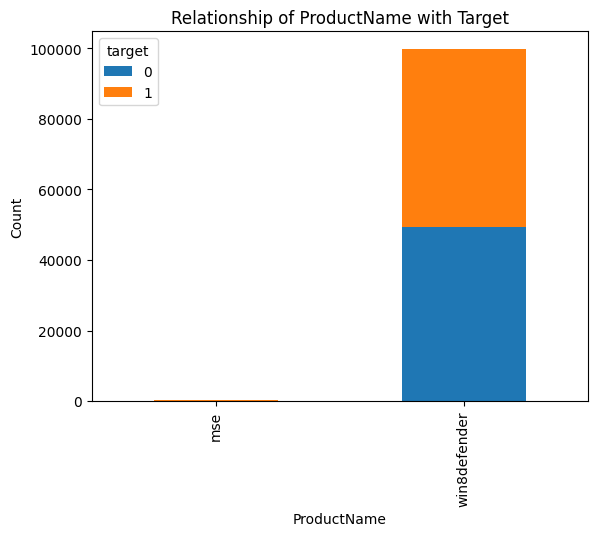

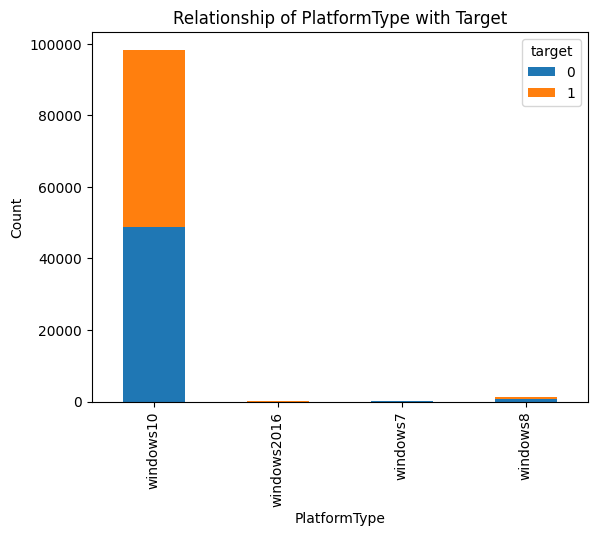

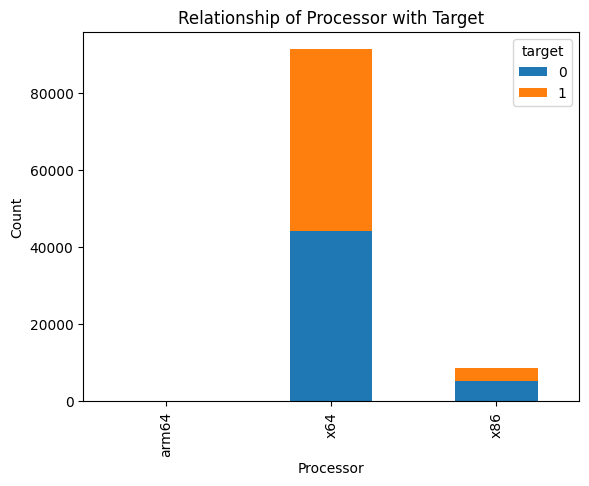

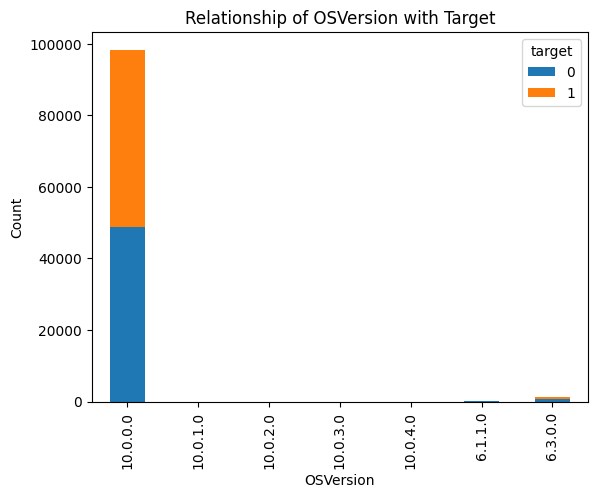

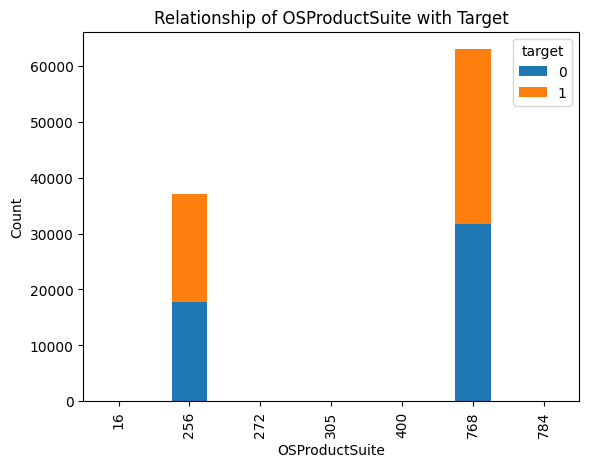

In [ ]:
for col in categorical_columns:
    cross_tab = pd.crosstab(train_df[col], train_df['target'])
    cross_tab.plot(kind='bar', stacked=True)
    plt.title(f'Relationship of {col} with Target')
    plt.ylabel('Count')
    plt.show()


**Understanding of Stacked Bar Charts (Categorical Features vs. Target Variable)**
These stacked bar charts show the relationship between different categorical variables and the target variable (0 and 1).


1. ProductName vs. Target:
  Almost all data points belong to "windowsdefender", with very few belonging to other categories and
  the proportion of target=1 (orange) and target=0 (blue) appears evenly distributed within "windowsdefender".
  The "mse" category is too small to make meaningful inferences.



2. PlatformType vs. Target:
   "Windows10" is the dominant category.
   "Windows8.1", "Windows8", "Windows7", and "Windows2016" have very few observations.
    The distribution of target=1 and target=0 within "Windows10" looks similar to other categories.



3. Processor vs. Target:
   "x64" dominates the dataset, with "x86" and "arm64" having fewer observations and
    the proportion of target=1 is quite similar across "x64" and "x86", while "arm64" has a different pattern.



4. OSVersion vs. Target:
   "10.0.0" is the dominant OS version, with a few instances of "8.3.0", "6.1.1.0", etc.
    The target=1 proportion looks similar across OS versions.



5. OSProductSuite vs. Target
  "768" and "256" are the most common categories.
  "768" seems to have a higher target=1 proportion compared to "256", "400", and others.



**Date/Time Columns
These include DateAS and DateOS**.



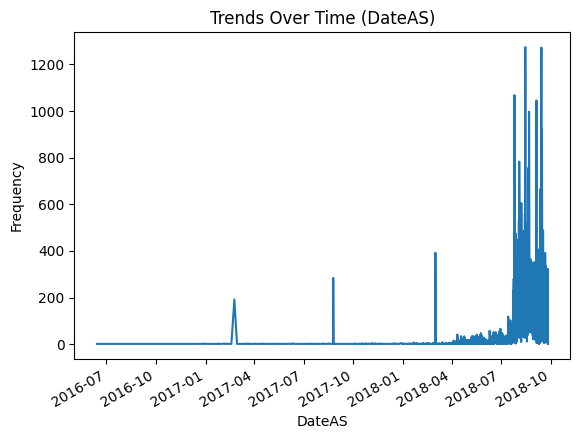

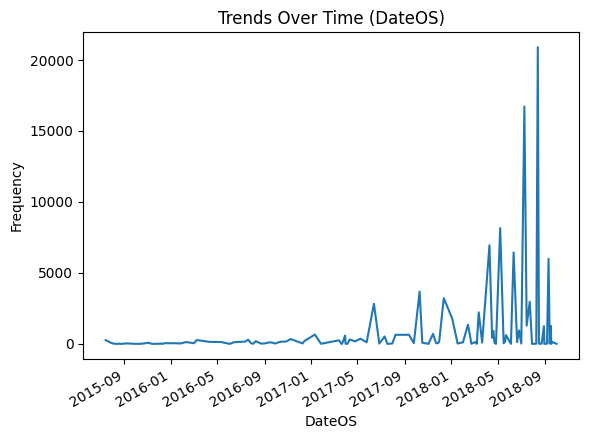

In [ ]:
train_df['DateAS'] = pd.to_datetime(train_df['DateAS'])
train_df['DateOS'] = pd.to_datetime(train_df['DateOS'])

train_df.groupby('DateAS').size().plot(kind='line')
plt.title('Trends Over Time (DateAS)')
plt.ylabel('Frequency')
plt.show()

train_df.groupby('DateOS').size().plot(kind='line')
plt.title('Trends Over Time (DateOS)')
plt.ylabel('Frequency')
plt.show()


**Understanding the Trends Over Time (DateAS & DateOS)**
The two line charts visualize the frequency of data occurrences over time for DateAS and DateOS.


* 📈 Trends Over Time (DateAS):
    The DateAS variable shows a sharp increase in frequency after mid-2018.
    Before that, data points are sparse with occasional spikes and this
    suggests that data collection or system activity significantly increased after mid-2018.

  
* 📉 Trends Over Time (DateOS):
    The DateOS variable starts earlier (2015), but activity remains low until mid-2017.
    There is a gradual increase in data frequency from 2017 onwards with more fluctuations.
    A major peak appears around mid-to-late 2018, similar to DateAS.


**MISSING DATA**
  
  Heatmap

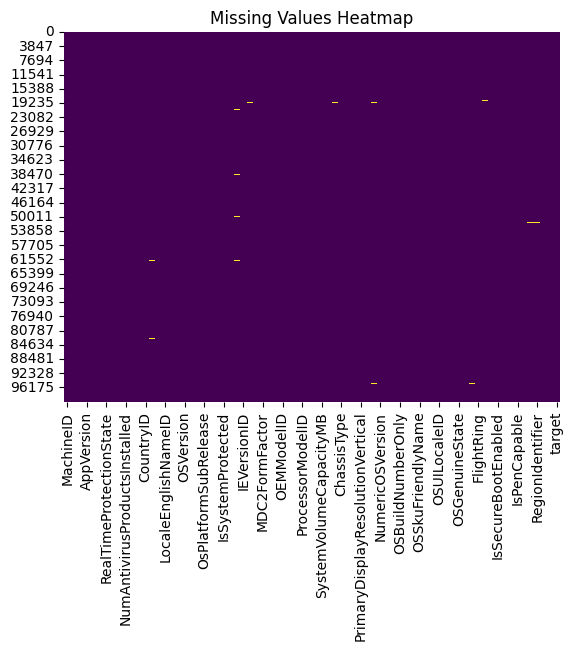

In [ ]:
sns.heatmap(train_df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


**Missing Values Heatmap**
This heatmap visualizes missing data in our dataset.


* Sparse Missing Data:

   The dataset has very few missing values, as seen by the small number of light-colored streaks.
   Missing values are scattered across different columns and rows.
  

* Columns with Missing Values:

  Some columns (like ProcessorModelID, ChassisType, and IsSecureBootEnabled) appear to have more missing values than others.
  The target column does not seem to have missing values, which is good for supervised learning.

Bar Chart

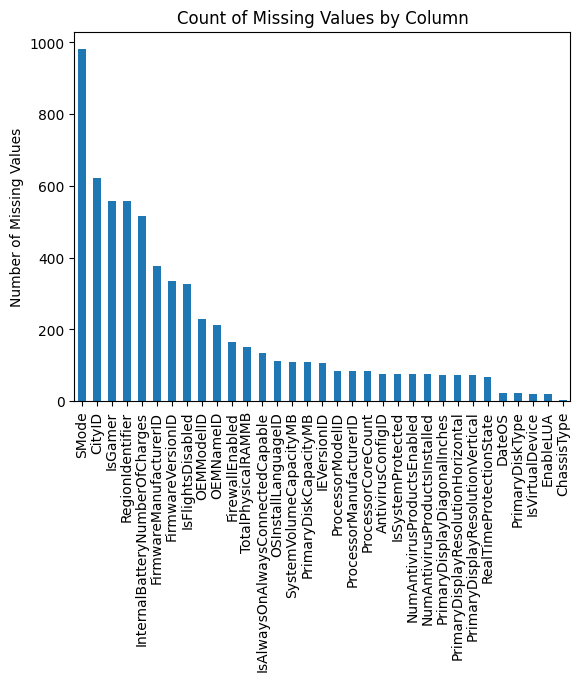

In [ ]:
missing_counts = train_df.isnull().sum()
missing_counts[missing_counts > 0].sort_values(ascending=False).plot(kind='bar')
plt.title('Count of Missing Values by Column')
plt.ylabel('Number of Missing Values')
plt.show()


**Missing values By Columns**
This bar chart shows the number of missing values for each column in our dataset.


* Top Columns with Missing Values:
  SMode, CnvID, IsGamer, and RegionIdentifier have the highest number of missing values.
  These columns may require special handling, such as imputation or removal.


* Columns with Few or No Missing Values:
  Features like PrimaryDiskType, IsTouchEnabled, and ChassisType have very few or no missing values.
  These are less concerning and may not require much preprocessing.




**TARGET COLUMN**
  
   COUNTPLOT

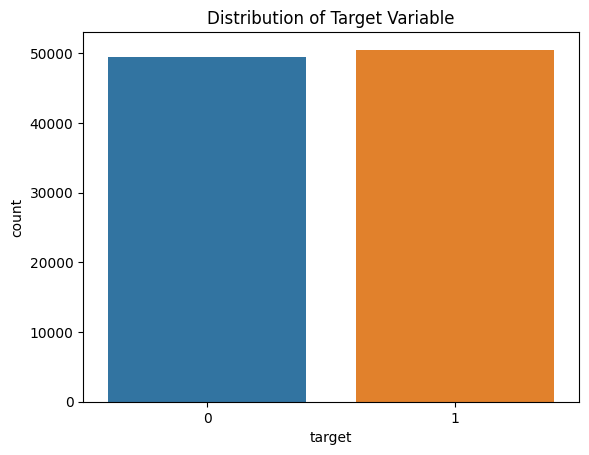

In [ ]:
sns.countplot(x='target', data=train_df)
plt.title('Distribution of Target Variable')
plt.show()


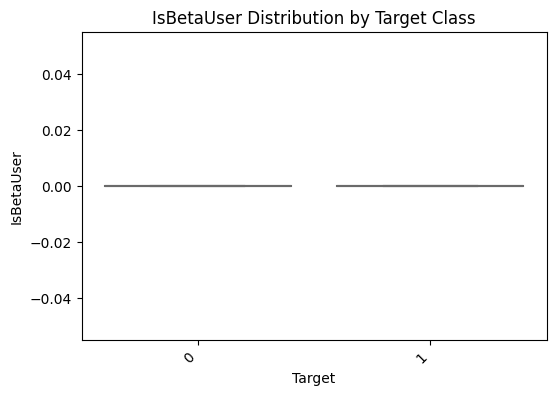

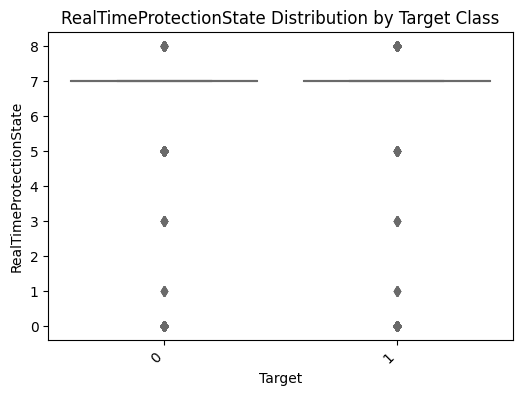

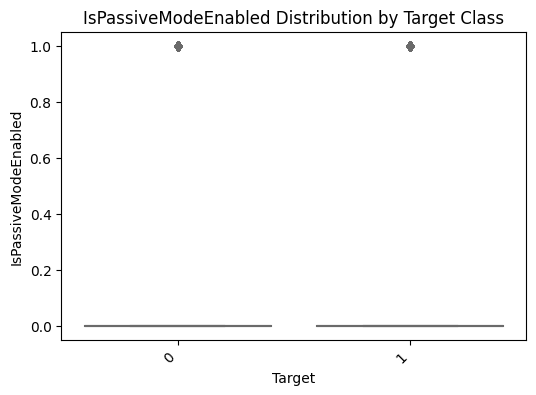

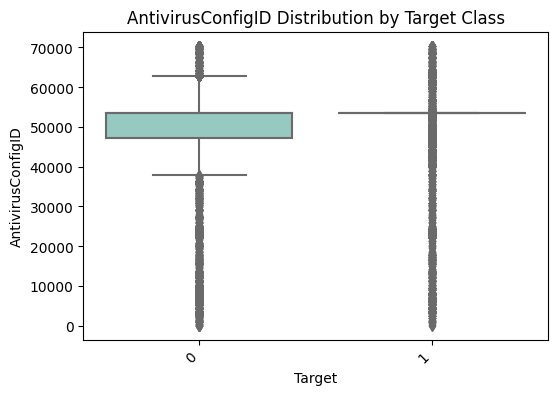

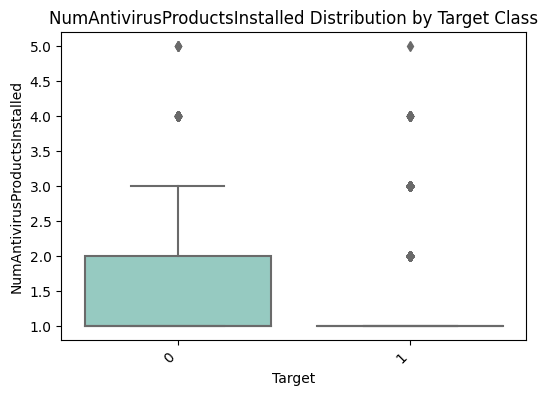

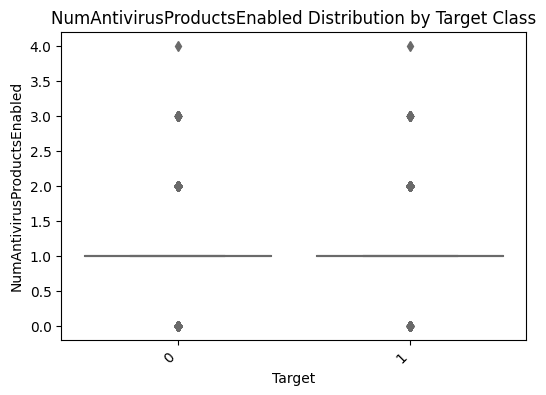

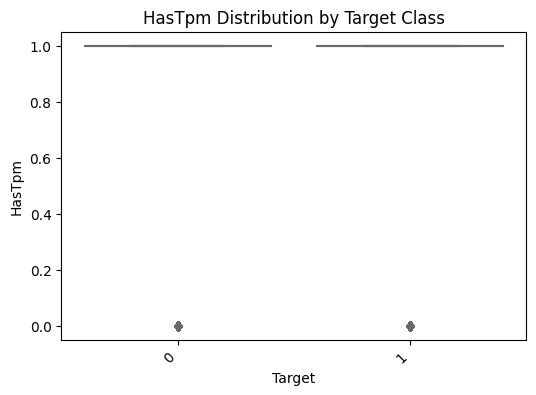

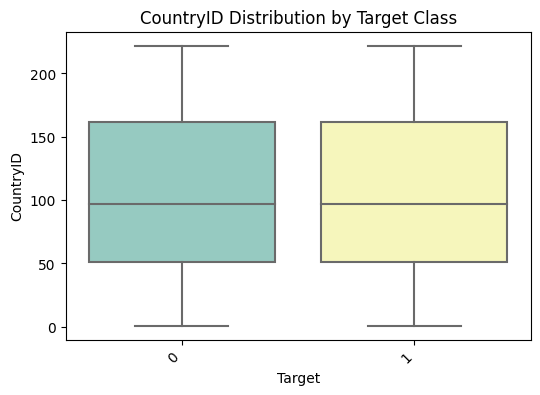

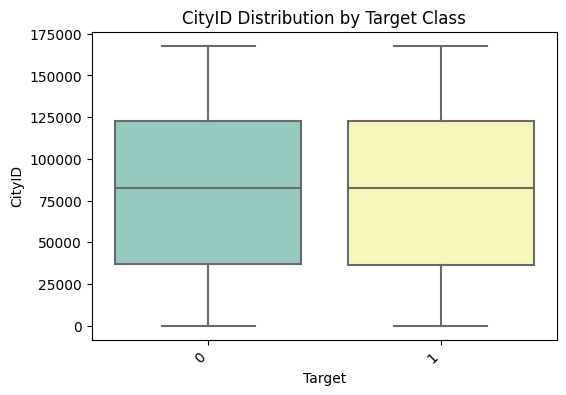

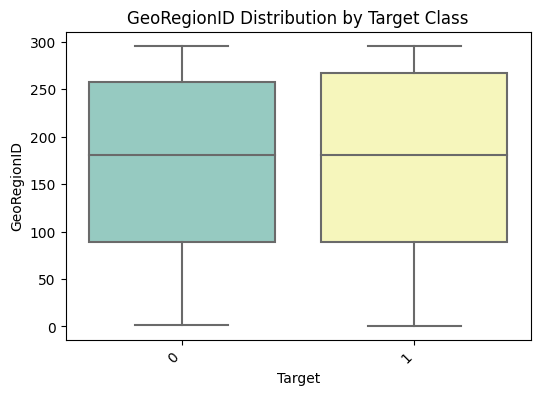

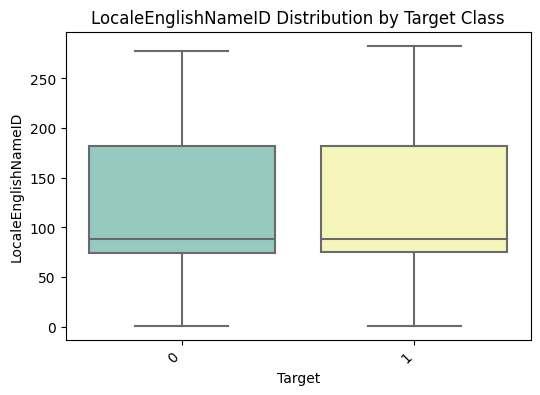

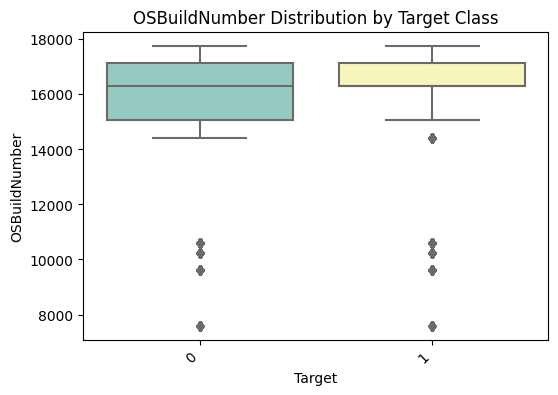

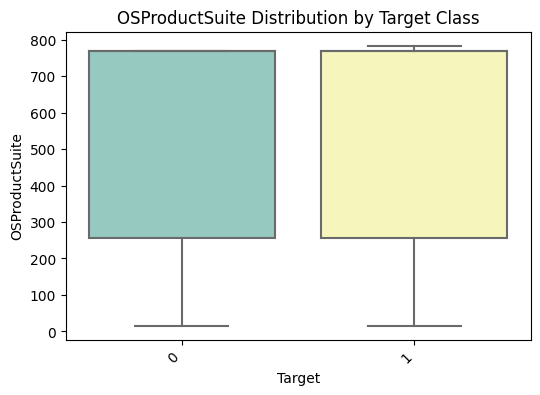

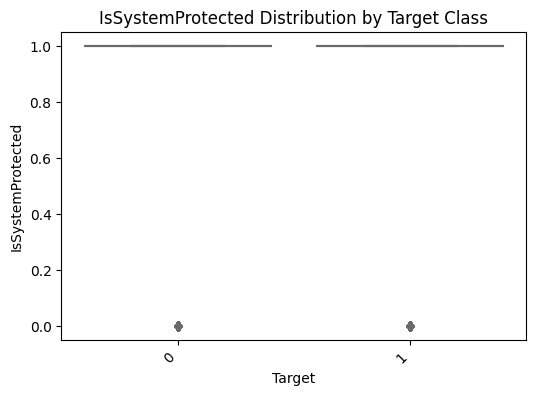

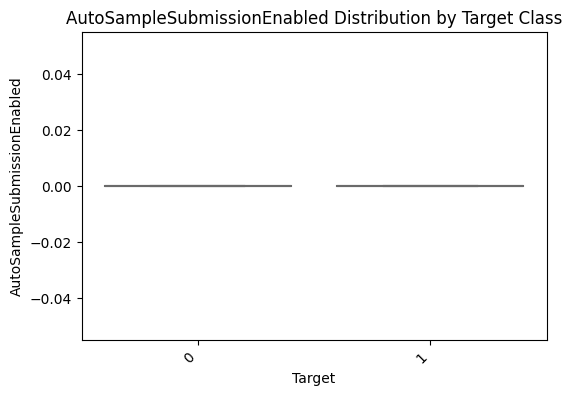

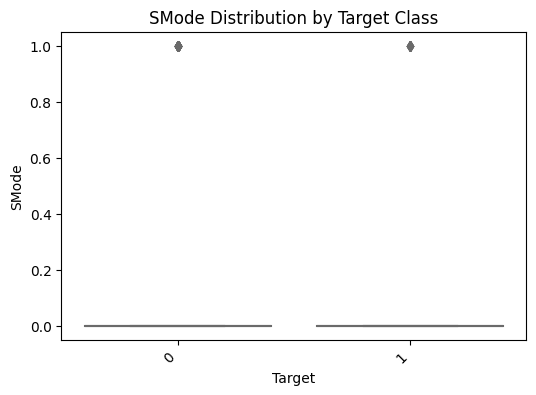

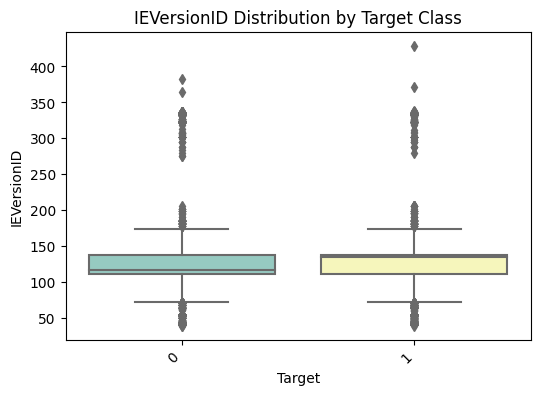

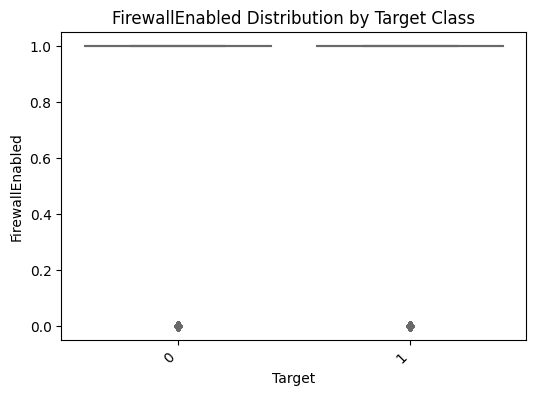

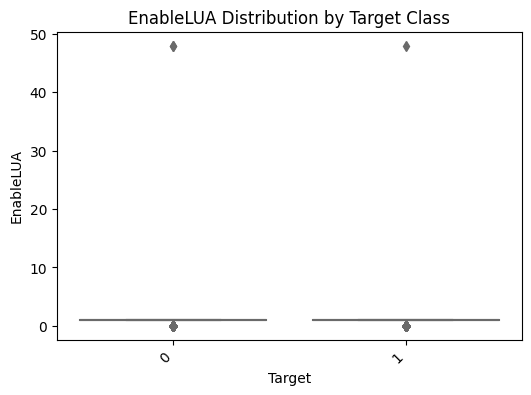

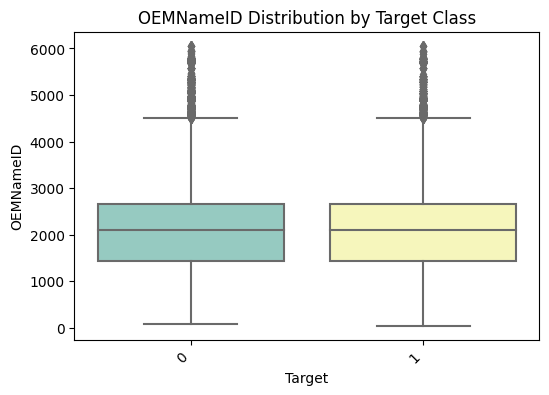

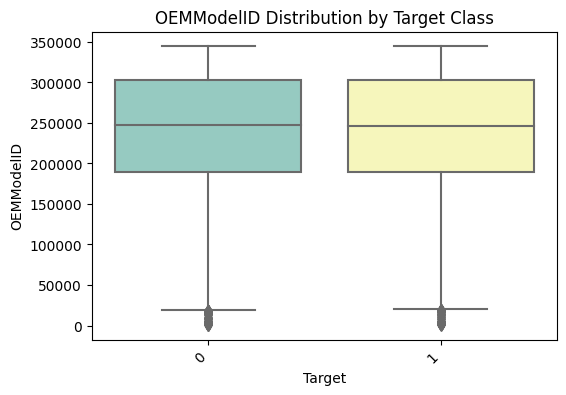

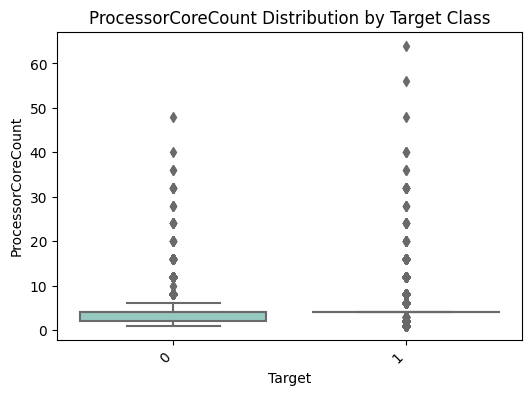

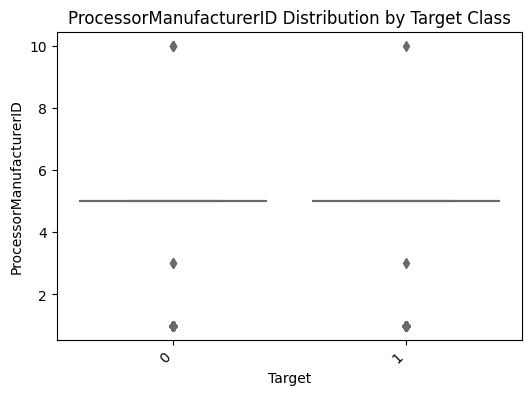

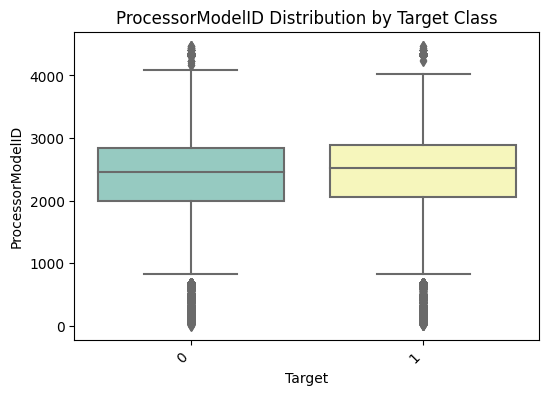

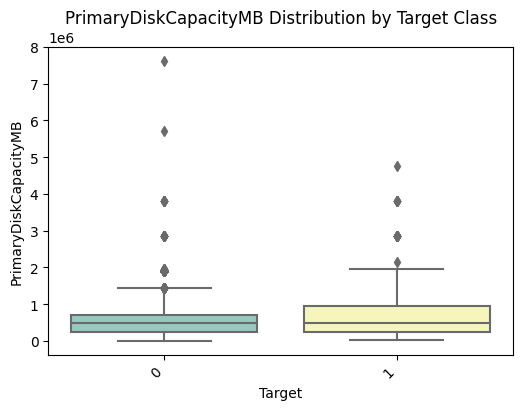

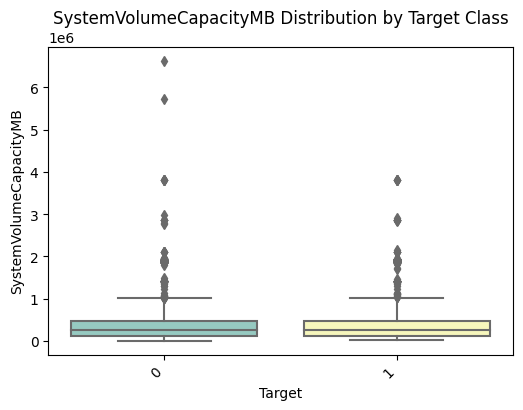

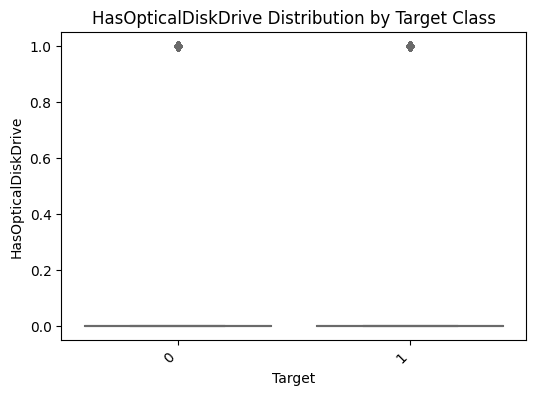

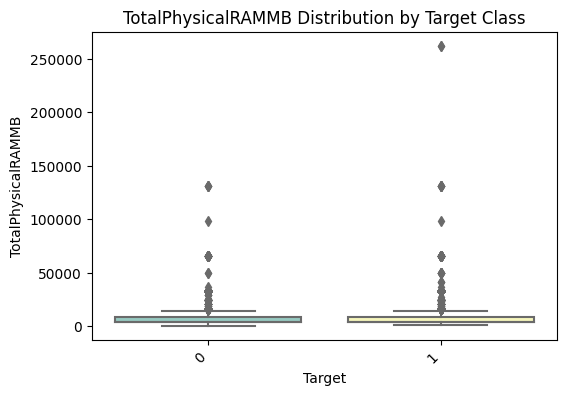

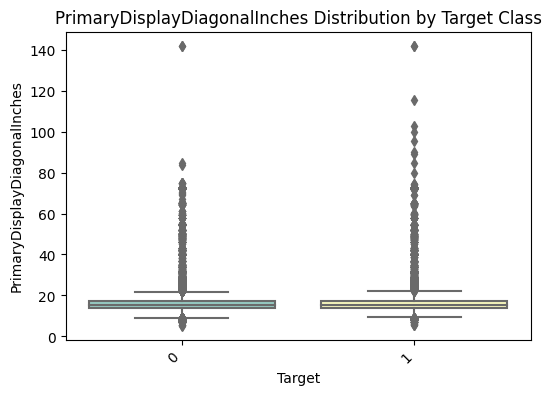

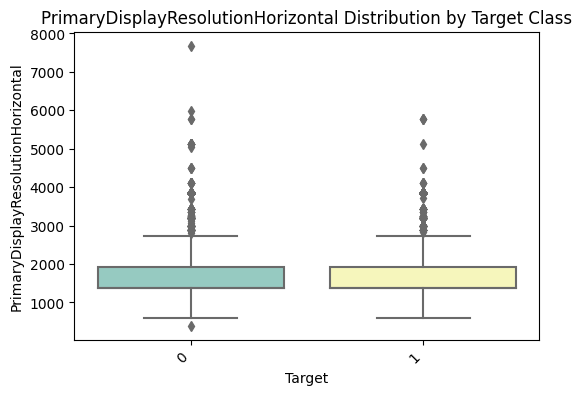

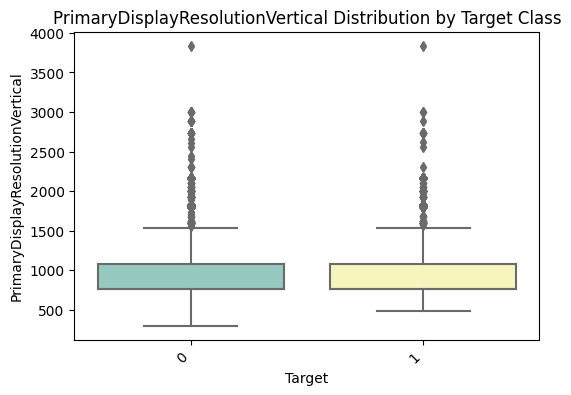

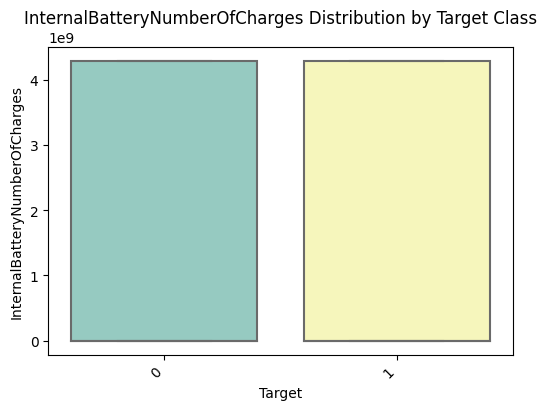

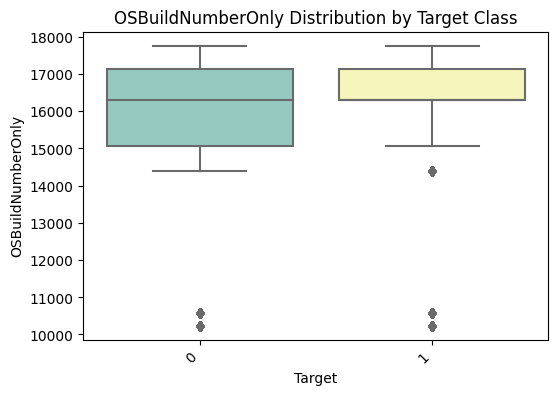

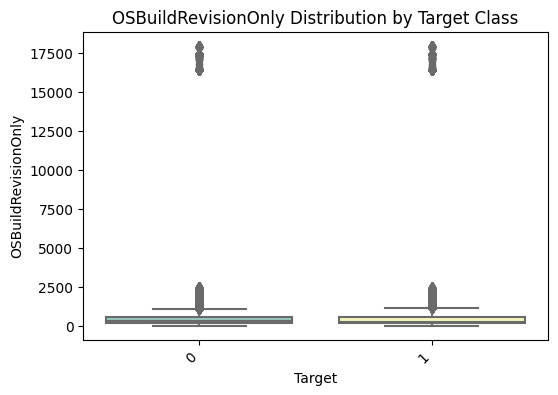

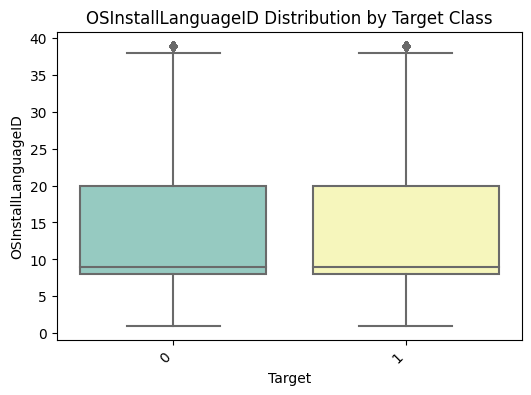

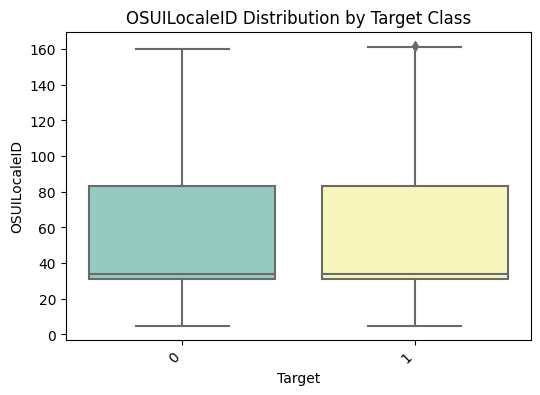

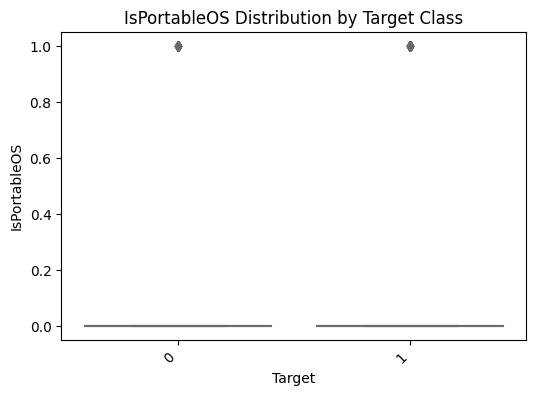

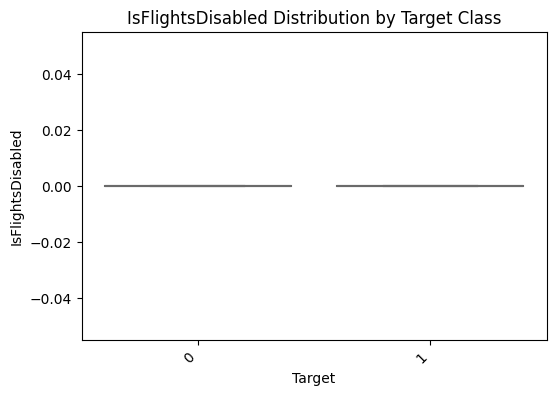

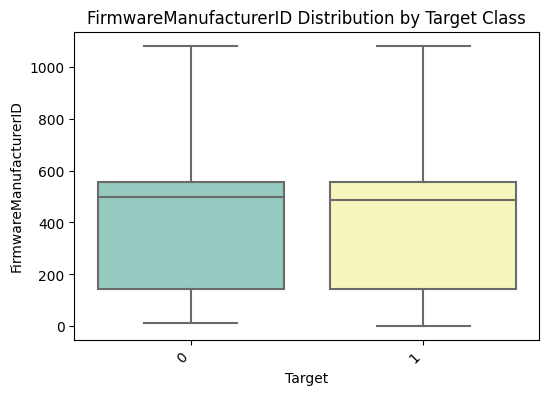

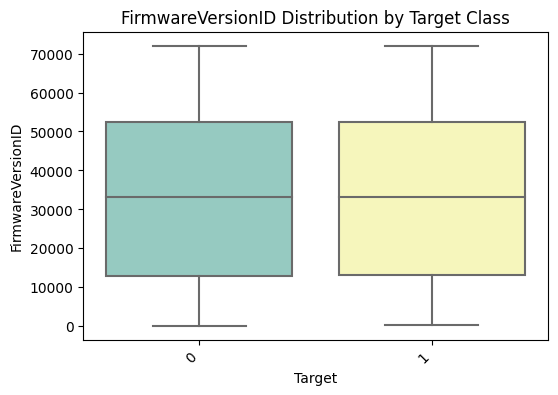

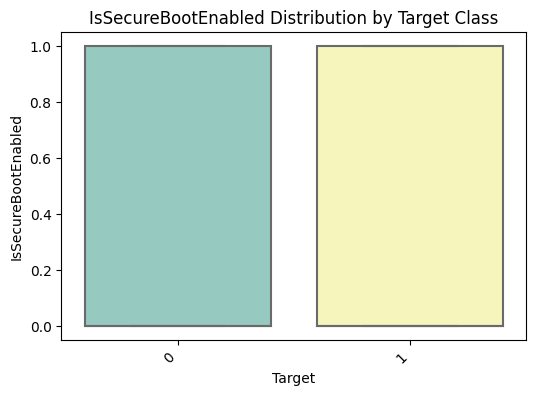

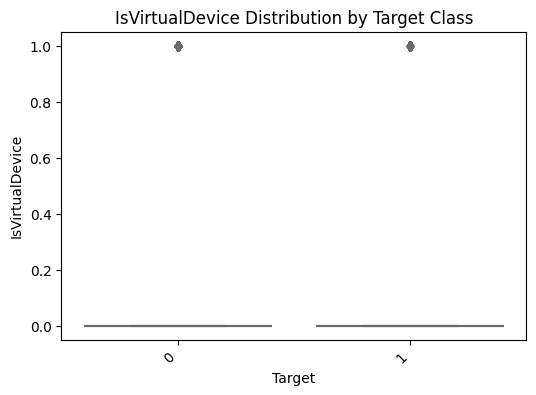

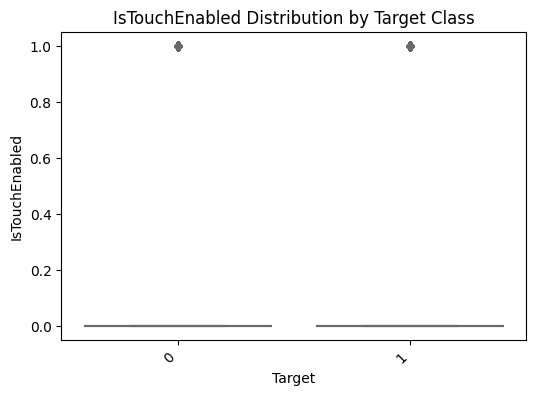

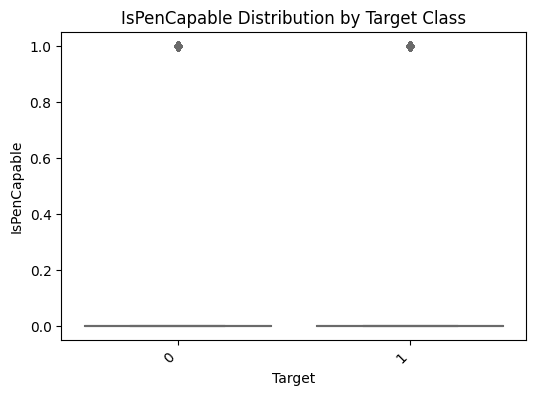

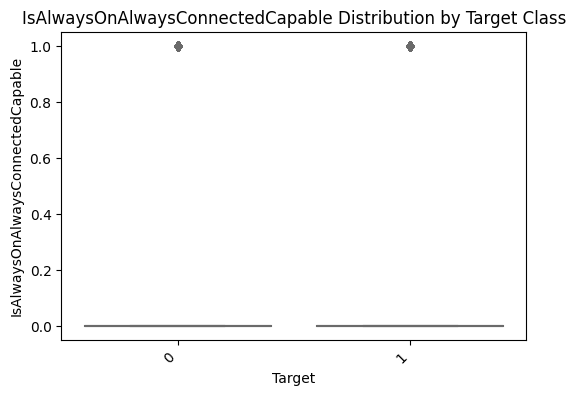

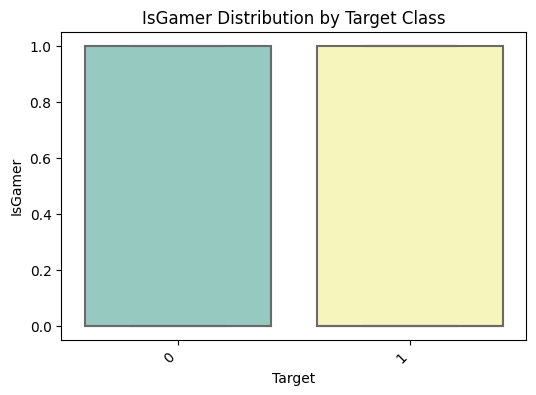

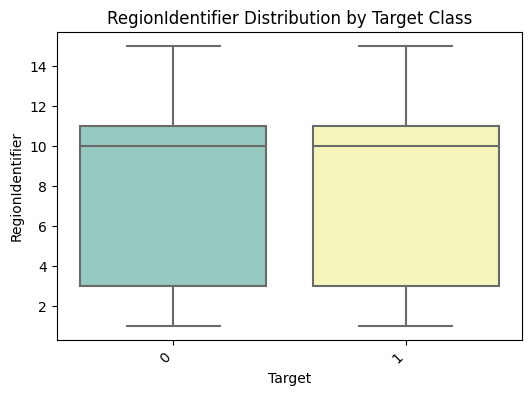

In [ ]:
numerical_columns = train_df.select_dtypes(include=['float64', 'int64']).columns


for feature in numerical_columns[:-1]:  # Exclude the target column from features
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=train_df, x='target', y=feature, palette='Set3')
    plt.title(f'{feature} Distribution by Target Class')
    plt.xlabel('Target')
    plt.ylabel(feature)
    plt.xticks(rotation=45, ha='right')
    plt.show()


**Understanding these BoxPlots**
Each boxplot shows the distribution of a numerical feature split by the target variable (0 or 1).


1.  Detecting Outliers:
The dots outside the whiskers in the boxplots indicate outliers—values that are much higher or lower than the rest.
Features like AntivirusConfigID and NumAntivirusProductsInstalled have many outliers, which might impact model performance.


2. Feature Distributions by Target Class:
If a feature has a very different distribution for target = 0 vs. target = 1, it could be useful for prediction.
Example:
NumAntivirusProductsInstalled: Users with more antivirus products might have different security behaviors, which can correlate with the target variable.


3.  Feature Importance:
If the box and whiskers for target = 0 and target = 1 overlap a lot, the feature might not be useful for classification.
If they look different, the feature might be important for predicting the target.
Example:
IsBetaUser and IsPassiveModeEnabled seem to have very similar distributions across target = 0 and target = 1, which suggests they might not be strong predictors.


4. Skewness & Variability:
  Some boxplots might show skewed distributions, meaning most values are clustered towards one side.
  Example:
  AntivirusConfigID has a large spread of values, meaning it might need normalization or transformation.


Distribution of Numeric Features

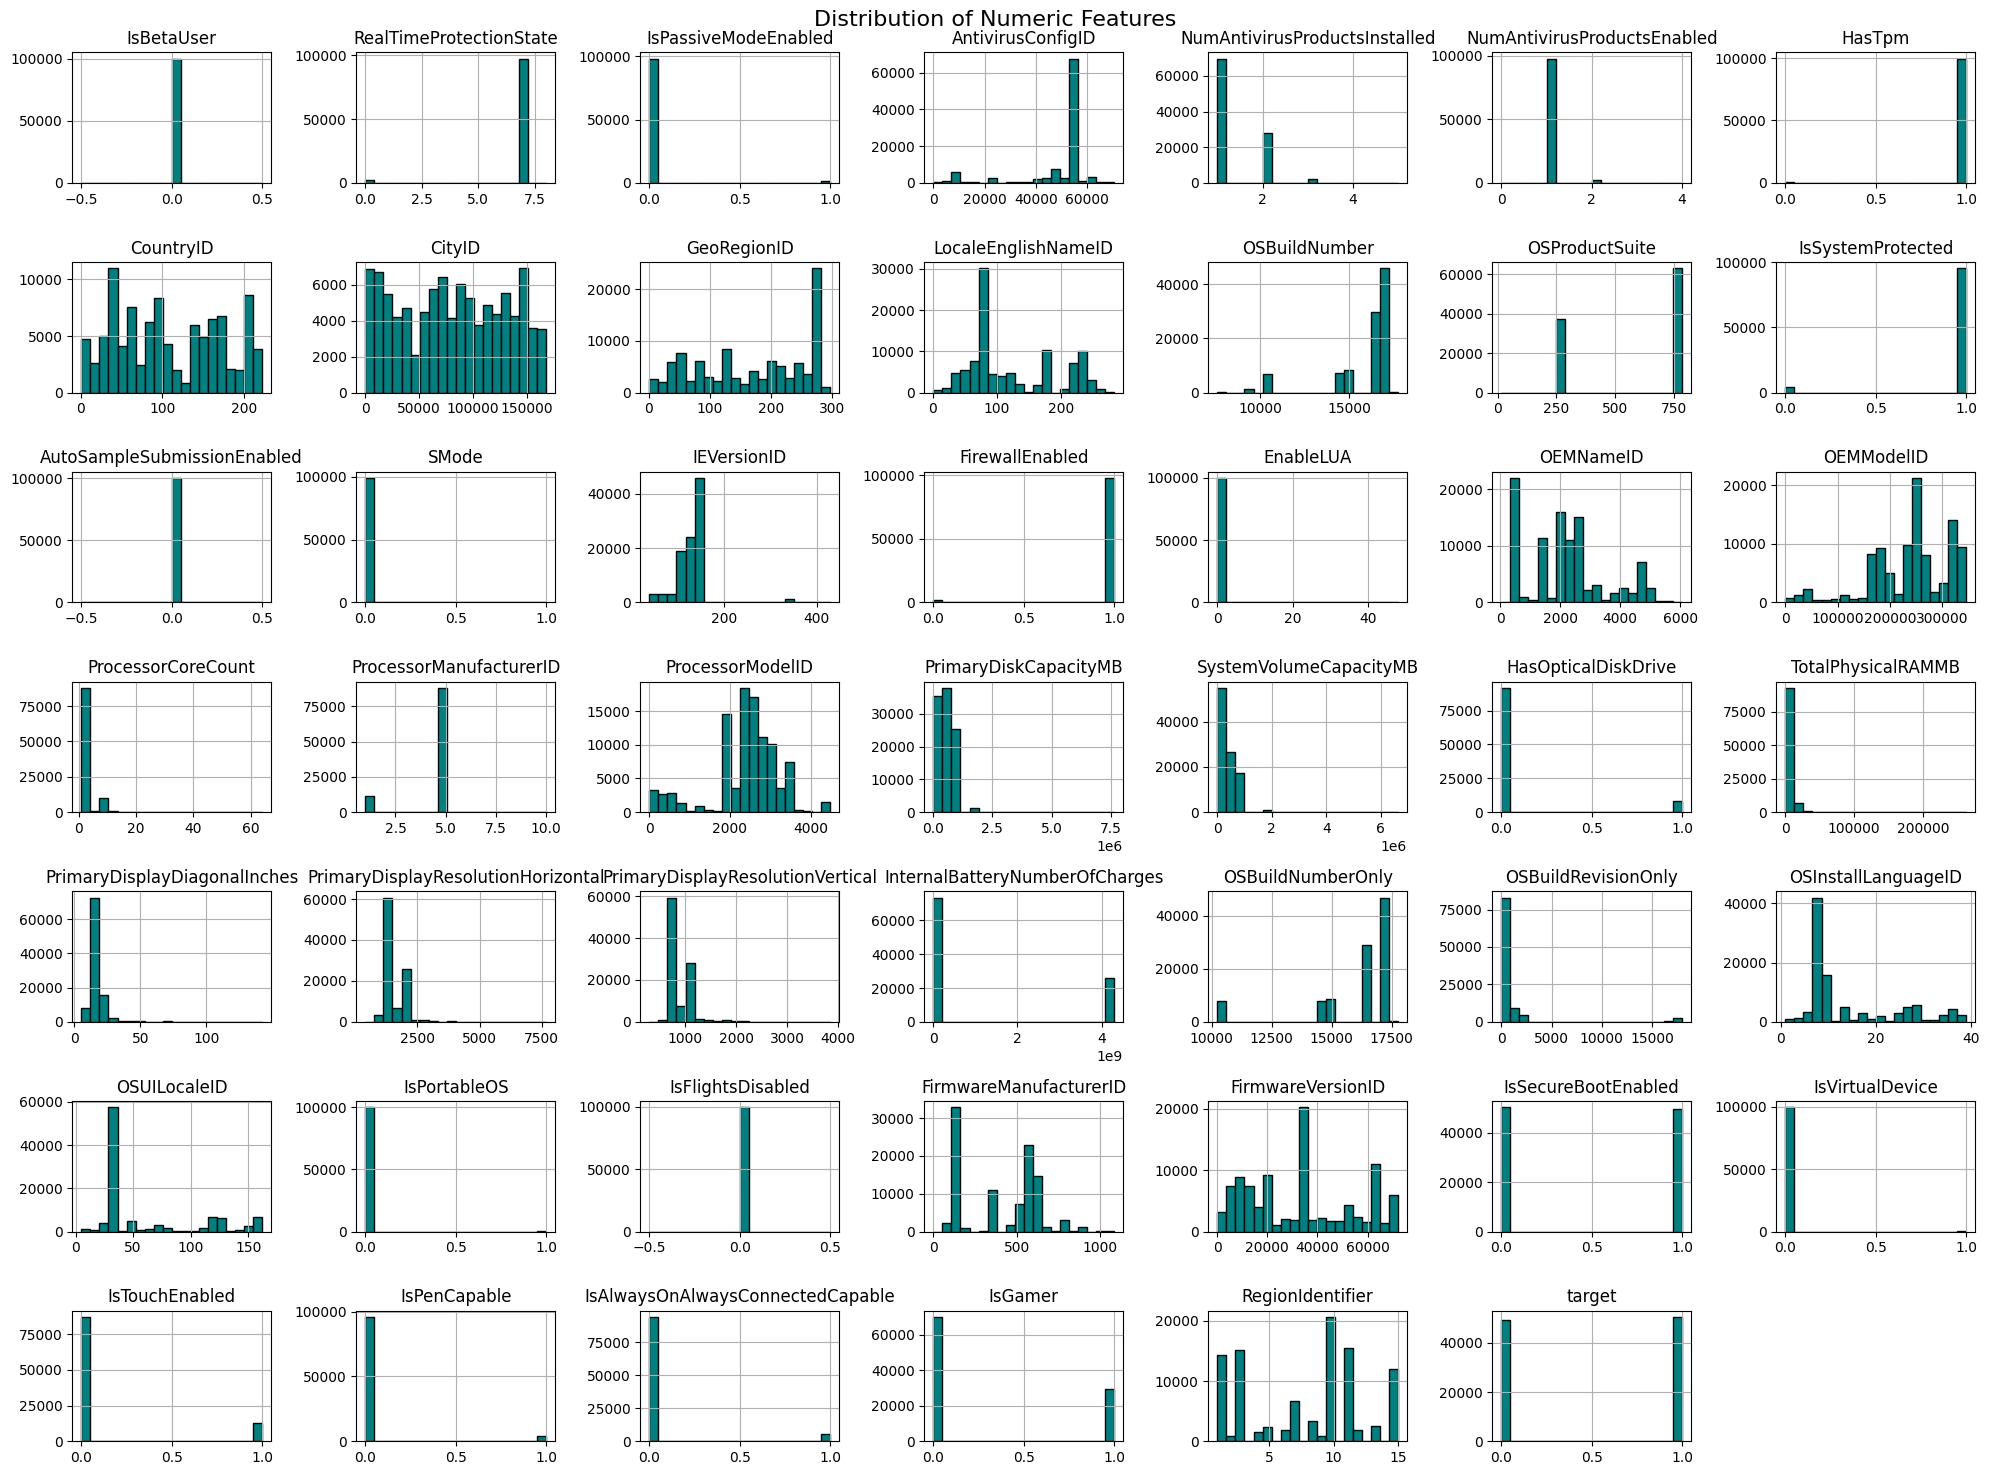

In [ ]:
# Numeric columns
numeric_columns = train_df.select_dtypes(include=['int64', 'float64']).columns

# Plotting histograms
train_df[numeric_columns].hist(figsize=(20, 15), bins=20, color='teal', edgecolor='black')
plt.suptitle("Distribution of Numeric Features", fontsize=16)
plt.tight_layout()
plt.show()


**Understanding these Histograms**
Histograms visualize the distribution of numeric features in the dataset.


1. Skewness & Normality 📈📉:

Some features (e.g., ProcessorCoreCount, PrimaryDiskCapacityMB) are right-skewed, meaning most values are concentrated near lower numbers, with a few large values.
Others (e.g., CityID, OSBuildNumber) seem multimodal, indicating multiple clusters.


2. Binary vs. Continuous Features:


Features like IsBetaUser, IsSystemProtected, and FirewallEnabled appear binary (0 or 1).
Others like TotalPhysicalRAMMB and InternalBatteryNumberOfCharges have continuous distributions.


3. Potential Feature Engineering Ideas:

Log transformation for right-skewed features.
Binning for features with multimodal distributions.
Normalization or Standardization for large-range features.


2.Categorical Feature Distribution

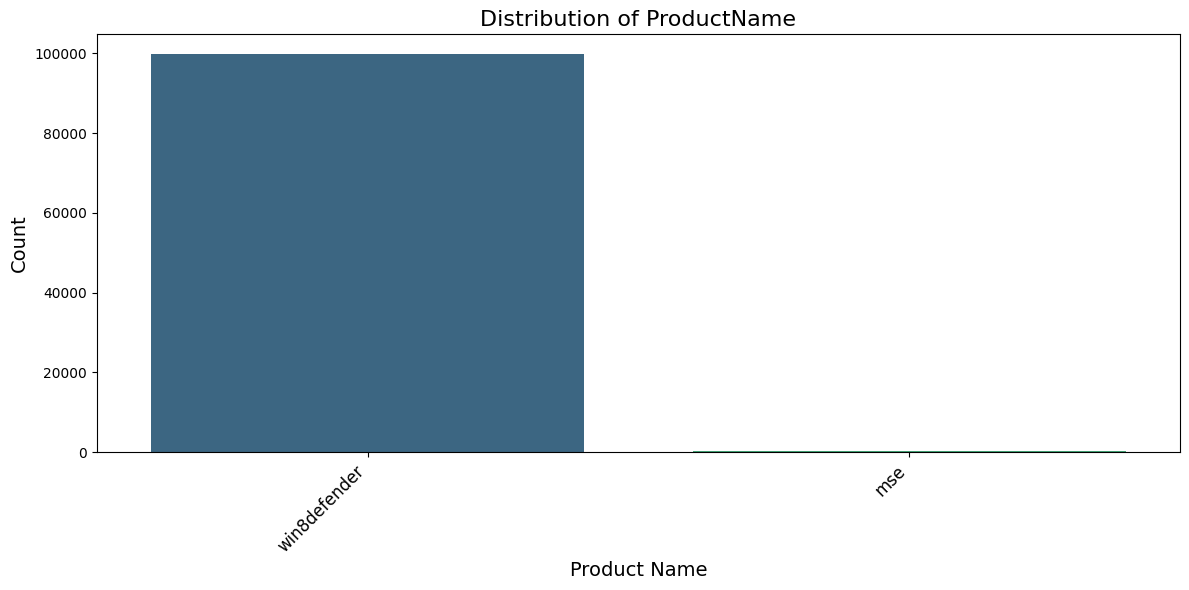

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(
    data=train_df,
    x='ProductName',
    palette='viridis',
    order=train_df['ProductName'].value_counts().index[:10]  # Top 10 most common values
)
plt.title('Distribution of ProductName', fontsize=16)
plt.xlabel('Product Name', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()
plt.show()


*Relationship between Numerical Values*

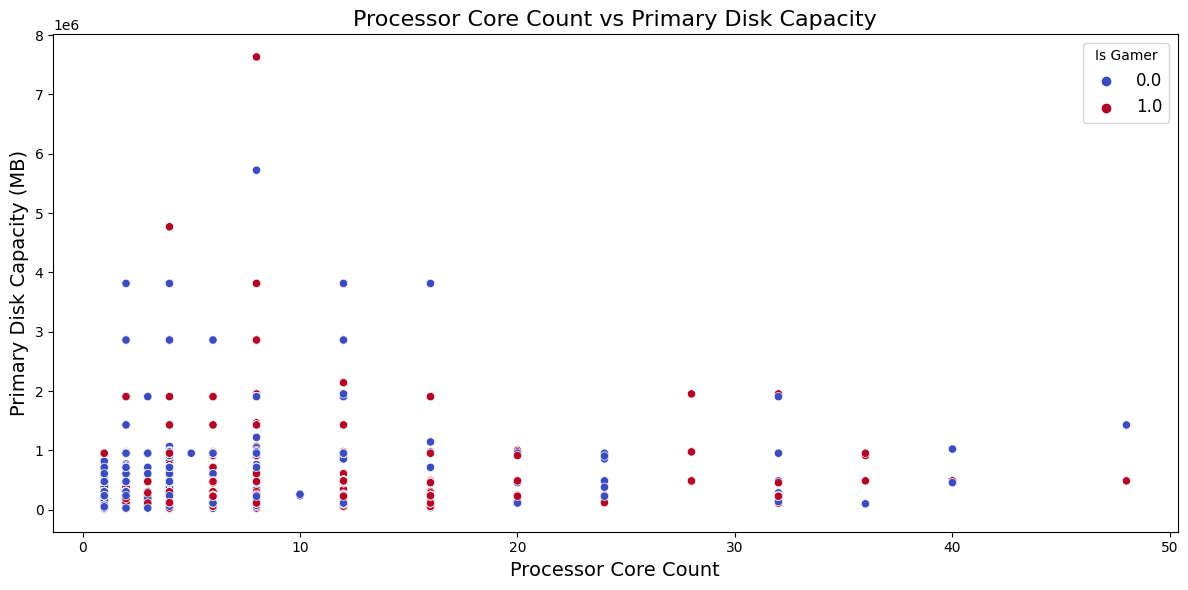

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=train_df,
    x='ProcessorCoreCount',
    y='PrimaryDiskCapacityMB',
    hue='IsGamer',
    palette='coolwarm'
)
plt.title('Processor Core Count vs Primary Disk Capacity', fontsize=16)
plt.xlabel('Processor Core Count', fontsize=14)
plt.ylabel('Primary Disk Capacity (MB)', fontsize=14)
plt.legend(title='Is Gamer', fontsize=12)
plt.tight_layout()
plt.show()


**Insights from the Scatter Plot**
This plot shows the relationship between Processor Core Count and Primary Disk Capacity (MB), colored by whether the user is a gamer (IsGamer = 1) or not (IsGamer = 0).


Observations:

1. Most users have low-to-moderate core counts:

   Majority of points are clustered around 4 to 10 cores.
  A few extreme cases go beyond 30+ cores, but they are rare.

2. Disk capacity is mostly concentrated at lower values:

   Many points are around 1 million MB (1TB).
   Some extreme values exceed 5–7 million MB (5–7TB).

3. Gamers vs. Non-Gamers:

   Gamers (red dots) seem to have slightly higher disk capacity in some cases.
   But, there is no clear distinction between gamers and non-gamers just based on cores vs. disk size.



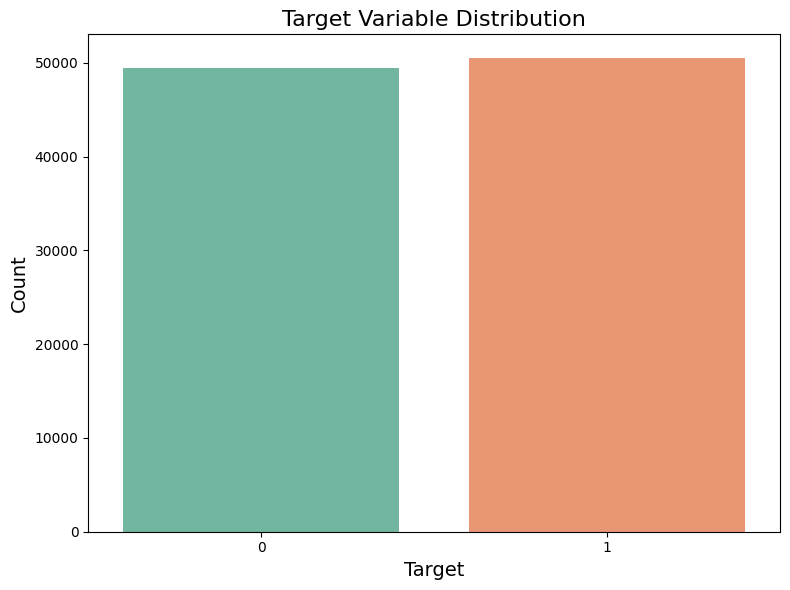

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=train_df, x='target', palette='Set2')
plt.title('Target Variable Distribution', fontsize=16)
plt.xlabel('Target', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.tight_layout()
plt.show()


**Box Plot for Numerical Features Grouped by Categorical Variable**

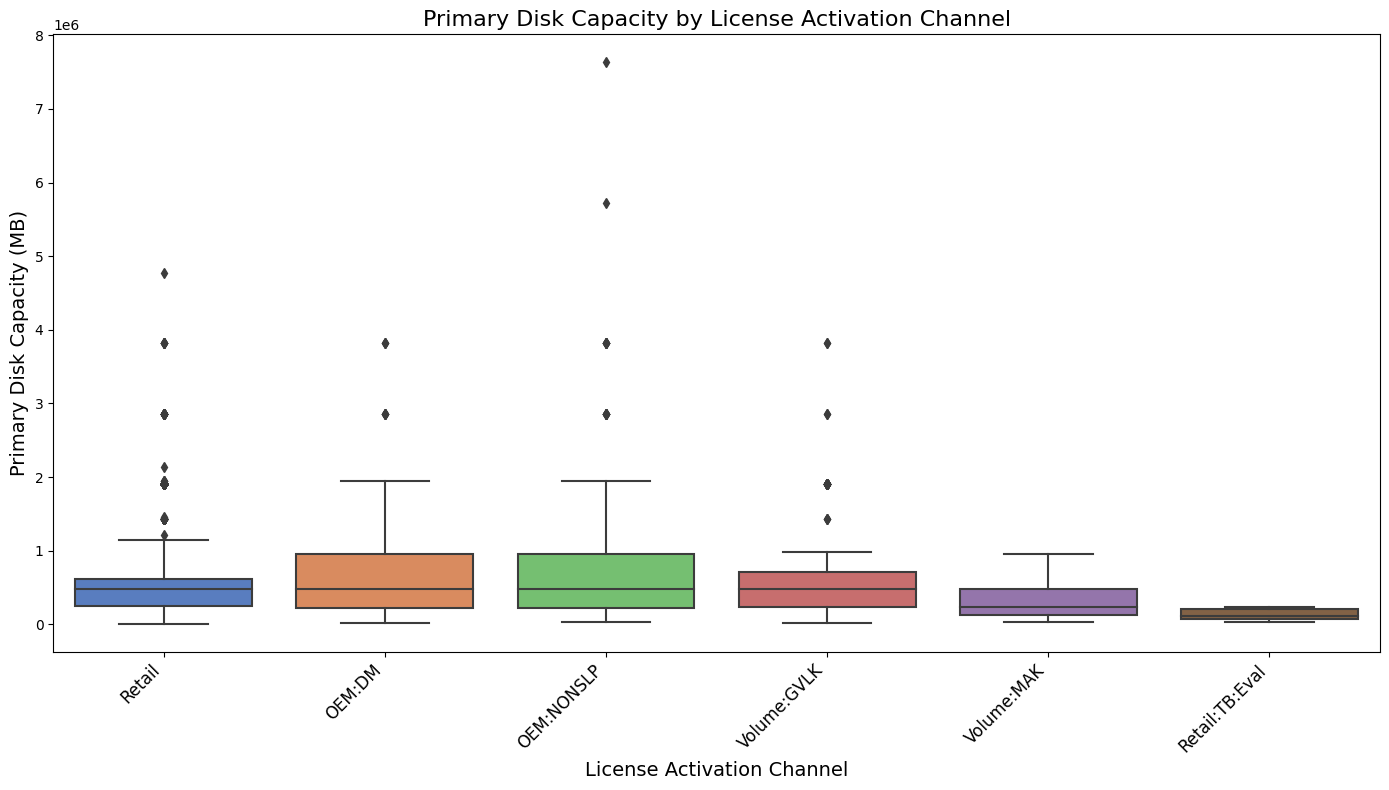

In [ ]:
plt.figure(figsize=(14, 8))
sns.boxplot(
    data=train_df,
    x='LicenseActivationChannel',
    y='PrimaryDiskCapacityMB',
    palette='muted'
)
plt.title('Primary Disk Capacity by License Activation Channel', fontsize=16)
plt.xlabel('License Activation Channel', fontsize=14)
plt.ylabel('Primary Disk Capacity (MB)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()
plt.show()


**Insights from the Plot**

This boxplot visualizes the distribution of Primary Disk Capacity (MB) across different License Activation Channels.


1. Variability Across Channels:

   Most activation channels have a similar median disk capacity.
   Volume:GVLK and Volume:MAK seem to have lower median capacities compared to OEM:DM and OEM:NONSLP.
   
2. Presence of Outliers:

   Outliers are present in all categories, with some extreme values reaching 7-8 million MB (7-8TB).
   Retail and OEM:DM have significant high-capacity outliers.


3. Comparing Categories:

   Retail.TB:Eval has the smallest variance in disk capacity.
   OEM:NONSLP shows a slightly wider spread compared to other categories.

**#  DATA CLEANING**

In [ ]:
# Count missing values
missing_data = train_df.isnull().sum()
print(missing_data[missing_data > 0])


RealTimeProtectionState                66
AntivirusConfigID                      76
NumAntivirusProductsInstalled          76
NumAntivirusProductsEnabled            76
CityID                                623
IsSystemProtected                      76
SMode                                 981
IEVersionID                           107
FirewallEnabled                       166
EnableLUA                              19
OEMNameID                             212
OEMModelID                            228
ProcessorCoreCount                     85
ProcessorManufacturerID                85
ProcessorModelID                       85
PrimaryDiskCapacityMB                 110
PrimaryDiskType                        23
SystemVolumeCapacityMB                110
TotalPhysicalRAMMB                    151
ChassisType                             2
PrimaryDisplayDiagonalInches           72
PrimaryDisplayResolutionHorizontal     72
PrimaryDisplayResolutionVertical       72
InternalBatteryNumberOfCharges    

In [ ]:
from sklearn.model_selection import train_test_split

# Split data first
X_train, X_test, y_train, y_test = train_test_split(train_df.drop('target', axis=1), train_df['target'], test_size=0.2, random_state=42)

# Calculate mean and mode on training data only
numerical_cols = X_train.select_dtypes(include=['float64', 'int64']).columns
numerical_means = X_train[numerical_cols].mean()

categorical_cols = X_train.select_dtypes(include=['object']).columns
categorical_modes = {col: X_train[col].mode()[0] for col in categorical_cols}

# Impute missing values in training data
X_train[numerical_cols] = X_train[numerical_cols].fillna(numerical_means)
for column in categorical_cols:
    X_train[column] = X_train[column].fillna(categorical_modes[column])

# Impute missing values in test data (using training data statistics)
X_test[numerical_cols] = X_test[numerical_cols].fillna(numerical_means)
for column in categorical_cols:
    X_test[column] = X_test[column].fillna(categorical_modes[column])


**Univariate Analysis**

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


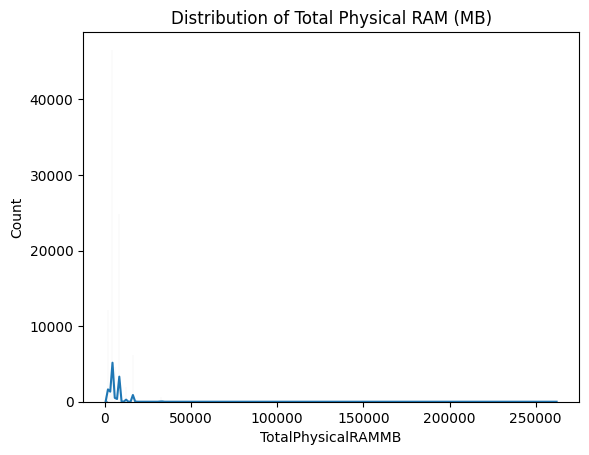

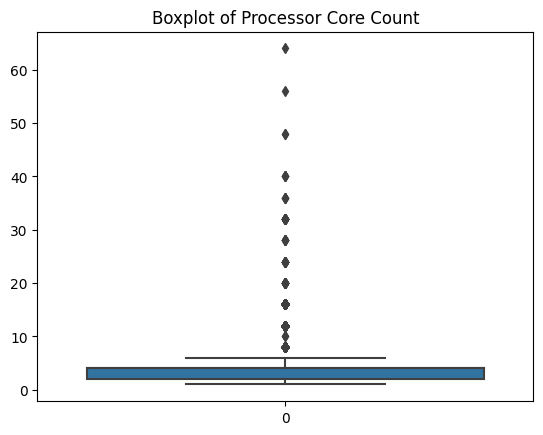

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram for TotalPhysicalRAMMB
sns.histplot(train_df['TotalPhysicalRAMMB'], kde=True)
plt.title('Distribution of Total Physical RAM (MB)')
plt.show()

# Boxplot for ProcessorCoreCount
sns.boxplot(train_df['ProcessorCoreCount'])
plt.title('Boxplot of Processor Core Count')
plt.show()

In [ ]:
from scipy.stats import ttest_ind

# Separate the groups
group1 = train_df[train_df['IsBetaUser'] == 1]['target']
group2 = train_df[train_df['IsBetaUser'] == 0]['target']

# Perform t-test
t_stat, p_val = ttest_ind(group1, group2, nan_policy='omit')
print(f"T-statistic: {t_stat}, P-value: {p_val}")


T-statistic: nan, P-value: nan


In [ ]:
from scipy.stats import chi2_contingency

# Contingency table for categorical variables
contingency_table = pd.crosstab(train_df['IsBetaUser'], train_df['target'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-square statistic: {chi2}, P-value: {p}")


Chi-square statistic: 0.0, P-value: 1.0


In [ ]:
   from sklearn.impute import SimpleImputer
   from sklearn.linear_model import LinearRegression
   from sklearn.model_selection import train_test_split
   from sklearn.pipeline import Pipeline

   # Features and target variable
   X = train_df[['TotalPhysicalRAMMB', 'ProcessorCoreCount', 'PrimaryDiskCapacityMB']]
   y = train_df['target']

   # Train-test split
   X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

   # Create an imputation pipeline
   pipeline = Pipeline([
       ('imputer', SimpleImputer(strategy='median')),  # Replace NaNs with median
       ('regressor', LinearRegression())
   ])

   # Fit the pipeline to the training data
   pipeline.fit(X_train, y_train)

   # Evaluate the model
   print(f"R-squared: {pipeline.score(X_test, y_test)}")
   print(train_df.isnull().sum())
   print(train_df.isnull().sum().sort_values(ascending=False))



R-squared: 0.004667517484866934
MachineID             0
ProductName           0
EngineVersion         0
AppVersion            0
SignatureVersion      0
                   ... 
IsGamer             559
RegionIdentifier    559
DateAS                0
DateOS               24
target                0
Length: 76, dtype: int64
SMode                             981
CityID                            623
RegionIdentifier                  559
IsGamer                           559
InternalBatteryNumberOfCharges    515
                                 ... 
DeviceFamily                        0
ProductName                         0
HasOpticalDiskDrive                 0
PowerPlatformRole                   0
target                              0
Length: 76, dtype: int64


**PCA**

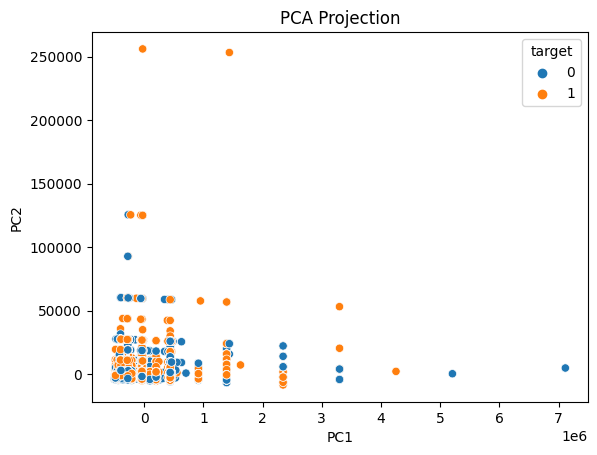

In [ ]:
   from sklearn.decomposition import PCA
   from sklearn.impute import SimpleImputer
   from sklearn.pipeline import Pipeline
   import pandas as pd
   import seaborn as sns
   import matplotlib.pyplot as plt


   # Create a pipeline
   pipeline = Pipeline([
       ('imputer', SimpleImputer(strategy='median')),  # Replace NaNs with median
       ('pca', PCA(n_components=2))
   ])

   # Fit and transform the data using the pipeline
   principal_components = pipeline.fit_transform(X)

   # Create DataFrame for visualization
   principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

   # Visualize PCA result
   sns.scatterplot(x='PC1', y='PC2', data=principal_df, hue=train_df['target'])
   plt.title('PCA Projection')
   plt.show()

**Observations from PCA Projection**

  PCA projection shows the first two principal components (PC1 and PC2), which summarize the variance in our dataset.

  1. Overlapping Classes:

     The blue (target = 0) and orange (target = 1) points heavily overlap in the lower left region.
     This suggests poor separability between the two classes using just the first two principal components.
    
  2. Extreme Outliers in PC2:

     Some orange points (target = 1) are much higher in PC2, meaning they may have extreme feature values affecting variance.
     You might want to check if those samples have extreme values in raw features.

     
 3. Skewed PC1 Distribution:

    PC1 ranges from 0 to ~7 million, suggesting it captures a feature with large numerical differences.
    It might be worth normalizing the features before PCA.


**TRAIN TEST SPLIT**

In [ ]:
from sklearn.model_selection import train_test_split

# Select Features (X) and Target (y)
X = train_df.drop(columns=['target'])  # Drop the target column to get the features
y = train_df['target']  # The target column

# Split the dataset into train and validation sets (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the shape of the splits
print(f"Training features shape: {X_train.shape}")
print(f"Validation features shape: {X_val.shape}")
print(f"Training target shape: {y_train.shape}")
print(f"Validation target shape: {y_val.shape}")


Training features shape: (80000, 75)
Validation features shape: (20000, 75)
Training target shape: (80000,)
Validation target shape: (20000,)


Data is split correctly:

80,000 samples (80%) in the training set
20,000 samples (20%) in the validation set
Each sample has 75 features (columns)


In [ ]:
# Handling missing numerical values by filling with the median
numerical_columns = train_df.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_columns:
    train_df[col] = train_df[col].fillna(train_df[col].median())  # Remove inplace=True

# Handling missing categorical values by filling with the mode (most frequent value)
categorical_columns = train_df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    train_df[col] = train_df[col].fillna(train_df[col].mode()[0])  # Remove inplace=True

# Check if there are still any missing values
print(train_df.isnull().sum())

MachineID            0
ProductName          0
EngineVersion        0
AppVersion           0
SignatureVersion     0
                    ..
IsGamer              0
RegionIdentifier     0
DateAS               0
DateOS              24
target               0
Length: 76, dtype: int64


In [ ]:
# Calculate the IQR (Interquartile Range) for numerical columns
Q1 = train_df[numerical_columns].quantile(0.25)
Q3 = train_df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove rows where numerical features are outliers
train_df = train_df[~((train_df[numerical_columns] < lower_bound) | (train_df[numerical_columns] > upper_bound)).any(axis=1)]

# Check the updated shape of the dataset
print(train_df.shape)


(27741, 76)


**Understanding the Output After Outlier Removal**

After applied Interquartile Range (IQR) filtering to remove outliers from numerical columns.

The dataset originally had 80,000 rows (before train-test split).

After filtering, it now has 27,741 rows and 76 columns.

This means many rows (over 50,000) were considered outliers and removed.


**SCALING**

In [ ]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns
numerical_columns = train_df.select_dtypes(include=['float64', 'int64']).columns

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply scaling to the numerical columns
train_df[numerical_columns] = scaler.fit_transform(train_df[numerical_columns])

# Verify the scaling (check the mean and standard deviation of the columns)
print(train_df[numerical_columns].mean())
print(train_df[numerical_columns].std())


IsBetaUser                            0.000000e+00
RealTimeProtectionState               0.000000e+00
IsPassiveModeEnabled                  0.000000e+00
AntivirusConfigID                    -8.411457e-16
NumAntivirusProductsInstalled         2.274474e-16
NumAntivirusProductsEnabled           0.000000e+00
HasTpm                                0.000000e+00
CountryID                            -1.137237e-16
CityID                               -4.200606e-17
GeoRegionID                          -1.126992e-16
LocaleEnglishNameID                  -1.792942e-17
OSBuildNumber                         2.740639e-17
OSProductSuite                        2.341069e-16
IsSystemProtected                     0.000000e+00
AutoSampleSubmissionEnabled           0.000000e+00
SMode                                 0.000000e+00
IEVersionID                           5.020236e-16
FirewallEnabled                       0.000000e+00
EnableLUA                             0.000000e+00
OEMNameID                      

**Understanding the Output After Standard Scaling**
 After applying StandardScaler, the mean of all numerical features is approximately 0, and the standard deviation is approximately 1.

   * Mean is near zero (≈ 0) → This ensures that the dataset is centered.
   * Standard deviation is near one (≈ 1) → This ensures that the dataset is scaled properly.
   * Binary variables (0/1) remain unchanged → Features like IsBetaUser, IsPassiveModeEnabled, IsSecureBootEnabled are not affected because scaling doesn't impact binary values.
   * Categorical features were not affected → Only numerical features were standardized.



# Data Preprocessing

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
min_max_scaler = MinMaxScaler()

# Apply Min-Max scaling to the numerical columns
train_df[numerical_columns] = min_max_scaler.fit_transform(train_df[numerical_columns])

# Verify the scaling (check the min and max of the columns)
print(train_df[numerical_columns].min())
print(train_df[numerical_columns].max())


IsBetaUser                            0.0
RealTimeProtectionState               0.0
IsPassiveModeEnabled                  0.0
AntivirusConfigID                     0.0
NumAntivirusProductsInstalled         0.0
NumAntivirusProductsEnabled           0.0
HasTpm                                0.0
CountryID                             0.0
CityID                                0.0
GeoRegionID                           0.0
LocaleEnglishNameID                   0.0
OSBuildNumber                         0.0
OSProductSuite                        0.0
IsSystemProtected                     0.0
AutoSampleSubmissionEnabled           0.0
SMode                                 0.0
IEVersionID                           0.0
FirewallEnabled                       0.0
EnableLUA                             0.0
OEMNameID                             0.0
OEMModelID                            0.0
ProcessorCoreCount                    0.0
ProcessorManufacturerID               0.0
ProcessorModelID                  

**Understanding the Output After Min-Max Scaling**

 After applying MinMaxScaler, the minimum value of each numerical column is 0, and the maximum value is 1.


   * All values are scaled between [0, 1] → This ensures that no feature dominates others.
   * Binary variables (0/1) remain unchanged → Features like IsBetaUser, IsSecureBootEnabled were already in this range.
   * Categorical features (encoded as numbers) are now between [0, 1] → E.g., CountryID, CityID, FirmwareManufacturerID.
   * Continuous numerical features now follow a [0, 1] distribution → No extreme values.



In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split


# Separate features (X) and target (y)
X = train_df.drop(columns=['target'])
y = train_df['target']

# Define numerical and categorical features
numerical_features = X.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Define the ColumnTransformer to preprocess the data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_features)
    ])

# Create the pipeline with preprocessor and other steps (e.g., classifier or regressor)
pipeline = Pipeline([
    ('preprocessor', preprocessor),
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Now, the pipeline can be used to transform data and make predictions
X_train_transformed = pipeline.transform(X_train)
X_test_transformed = pipeline.transform(X_test)



print(X_train_transformed[:5])



[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


Observations:
* Mostly Zeros in Transformed Data

  This suggests that most numerical features have been standardized to mean 0 and standard deviation 1, resulting in values close to 0 after transformation.
  For categorical features, One-Hot Encoding (OHE) likely produced many sparse (mostly zero) vectors.

* Few Ones in the Last Columns:

  These are likely One-Hot Encoded categorical features where a particular category is represented by 1.
  Each row belongs to a certain category, so only one column (category) gets a 1 while others stay 0.


In [ ]:
   from sklearn.compose import ColumnTransformer
   from sklearn.pipeline import Pipeline
   from sklearn.preprocessing import StandardScaler, OneHotEncoder



   # Define preprocessing steps
   numerical_features = X.select_dtypes(include=['float64', 'int64']).columns
   categorical_features = X.select_dtypes(include=['object']).columns

   preprocessor = ColumnTransformer(
       transformers=[
           ('num', StandardScaler(), numerical_features),
           ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_features)
       ])

   # Create a pipeline
   pipeline = Pipeline([
       ('preprocessor', preprocessor),

   ])

   # Fit the pipeline
   pipeline.fit(X_train)



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['IsBetaUser', 'RealTimeProtectionState', 'IsPassiveModeEnabled',
       'AntivirusConfigID', 'NumAntivirusProductsInstalled',
       'NumAntivirusProductsEnabled', 'HasTpm', 'CountryID', 'CityID',
       'GeoRegionID', 'LocaleEnglishNameID', 'OSBuildNumber', 'OSProductSuite',
       'IsSystemPro...
       'SignatureVersion', 'PlatformType', 'Processor', 'OSVersion',
       'OsPlatformSubRelease', 'OSBuildLab', 'SKUEditionName',
       'MDC2FormFactor', 'DeviceFamily', 'PrimaryDiskType', 'ChassisType',
       'PowerPlatformRole', 'NumericOSVersion', 'OSArchitecture', 'OSBranch',
       'OSEdition', 'OSSkuFriendlyName', 'OSInstallType',
       'AutoUpdateOptionsName', 'OSGenuineState', 'LicenseActivationChannel',
       'FlightRing'],
      dtype='object'))]))])

**CLASSIFICATION BASELINE MODEL**

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Separate features (X) and target (y)
X = train_df.drop(columns=['target'])
y = train_df['target']

# Define numerical and categorical features
numerical_features = X.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Define the preprocessor for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_features)
    ])

# Create a pipeline with the preprocessor and a Dummy Classifier (Baseline Model)
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DummyClassifier(strategy='most_frequent'))  # Using the most frequent strategy
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the baseline model
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy Score: 0.5732564426022707
Classification Report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      2368
         1.0       0.57      1.00      0.73      3181

    accuracy                           0.57      5549
   macro avg       0.29      0.50      0.36      5549
weighted avg       0.33      0.57      0.42      5549



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Understanding: Dummy Classifier as a Baseline**
The above code sets up a baseline model using DummyClassifier to compare against real models like Logistic Regression or Random Forest.

* Prepares Data

  Splits features (X) and target (y).
  Identifies numerical and categorical columns.

* Builds a Preprocessing Pipeline

  StandardScaler normalizes numerical data.
  OneHotEncoder converts categorical data to numeric format.

* Uses DummyClassifier as a Baseline

  Uses "most_frequent" strategy (always predicts the most common class in y_train).
  This gives us a "worst-case" benchmark to compare real models.

* Trains & Evaluates

  Splits data into train (80%) and test (20%).
  Trains the dummy model.
  Predicts and prints accuracy + classification report.

  Observations: Accuracy = 57.3%

  This means that 57.3% of the test samples belong to the majority class (1.0).

  Class Imbalance

  Class 0.0 (2368 samples) was never predicted (precision & recall = 0.00). Class 1.0 (3181 samples) was always predicted correctly (recall = 1.00). Macro avg f1-score = 0.36 (very     low) → suggests the model is biased towards class 1.

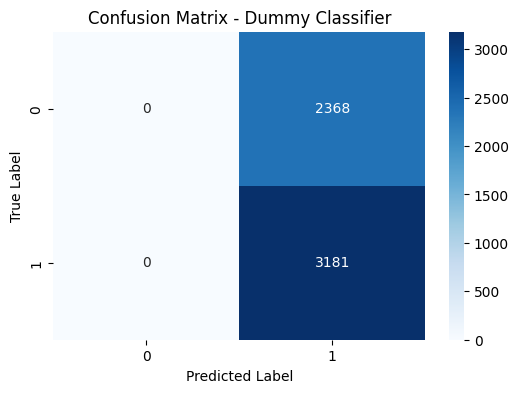

In [ ]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Dummy Classifier")
plt.show()


**Regression Baseline Model**

In [ ]:
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Function to preprocess data
def get_preprocessor(X):
    numerical_features = X.select_dtypes(include=['float64', 'int64']).columns
    categorical_features = X.select_dtypes(include=['object']).columns

    return ColumnTransformer([
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_features)
    ])

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(train_df.drop(columns=['target']), train_df['target'], test_size=0.2, random_state=42)

# Define pipeline
pipeline = Pipeline([
    ('preprocessor', get_preprocessor(X_train)),
    ('regressor', DummyRegressor(strategy='mean'))
])

# Train and evaluate
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

# Results
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared Score:", r2_score(y_test, y_pred))


Mean Squared Error: 0.24473150912606803
R-squared Score: -0.0004006626703418892


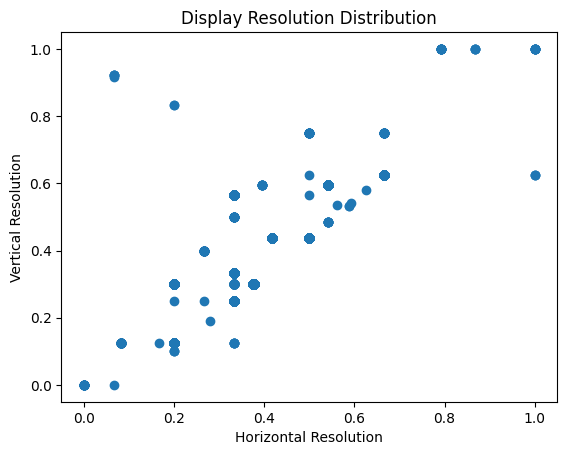

In [ ]:
plt.scatter(train_df['PrimaryDisplayResolutionHorizontal'], train_df['PrimaryDisplayResolutionVertical'])
plt.xlabel('Horizontal Resolution')
plt.ylabel('Vertical Resolution')
plt.title('Display Resolution Distribution')
plt.show()


our scatter plot shows the relationship between horizontal and vertical display resolution of devices.

Observations:

Positive correlation – As horizontal resolution increases, vertical resolution tends to increase as well.
Normalization applied? – The data seems scaled between 0 and 1, suggesting possible normalization.
Outliers at the top right – Some points are at (1,1) and others at (1,0.6), which may represent higher-end display resolutions.
Clustering in the middle – Indicates that most resolutions fall within a mid-range category.


**Logistic Regression Model (For Classification)**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Define preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), X_train.select_dtypes(include=['float64', 'int64']).columns),
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), X_train.select_dtypes(include=['object']).columns)
    ])

# Create pipeline with preprocessing + logistic regression
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(solver='lbfgs', max_iter=1000, random_state=42))
])

# Split train data further into train & validation
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Fit the pipeline
pipeline.fit(X_train_split, y_train_split)

# Make predictions
y_pred = pipeline.predict(X_val)

# Evaluate model
print("Accuracy:", accuracy_score(y_val, y_pred))
print(classification_report(y_val, y_pred))


Accuracy: 0.6041901329128182
              precision    recall  f1-score   support

         0.0       0.57      0.42      0.48      1956
         1.0       0.62      0.75      0.68      2483

    accuracy                           0.60      4439
   macro avg       0.60      0.58      0.58      4439
weighted avg       0.60      0.60      0.59      4439



**Understanding the Logistic Regression Results**

our regression model achieves 60.4% accuracy, which is an improvement over the baseline (DummyClassifier at 57.3%).


Accuracy: 60.4%

This is slightly better than the dummy model but still not great.
The model is learning, but there’s room for improvement.

Class 0 (Minority Class) Struggles

Precision: 0.57 → When the model predicts class 0, it is correct 57% of the time.
Recall: 0.42 → It only detects 42% of actual class 0 instances.
F1-score: 0.48 → Poor balance between precision & recall.

Class 1 (Majority Class) Performs Better

Precision: 0.62 → When the model predicts class 1, it's correct 62% of the time.
Recall: 0.75 → It detects 75% of actual class 1 instances.
F1-score: 0.68 → Better balance than class 0, but still not perfect.


Class Imbalance Issue

The model is still biased towards class 1.
It performs worse on class 0, meaning it misses many minority class instances.


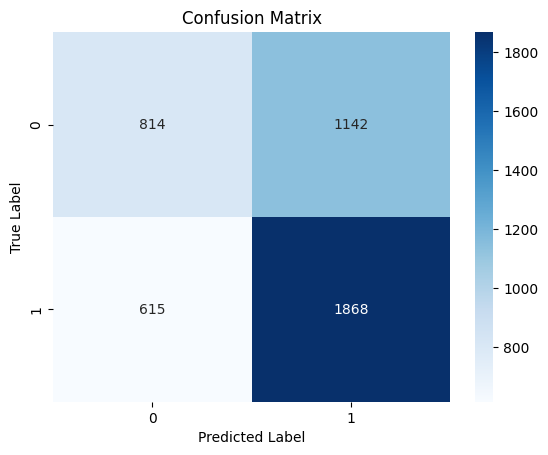

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


**Confusion Matrix Analysis**

 Observations:
 1. High False Positives (1142 cases)

    our model is misclassifying many negatives (Class 0) as positives (Class 1).
    This reduces precision for Class 1.
   
 2. Moderate False Negatives (615 cases)

    our model is missing some true positives, but not as severely.
    This affects recall for Class 1.
   
3. Better at Predicting Class 1

   Since 1868 out of 2483 positive cases were correctly classified, the model is favoring Class 1 over Class 0.

**MLIESTONE 1**

In [ ]:
import pandas as pd


df = pd.read_csv('/kaggle/input/System-Threat-Forecaster/train.csv')

# Drop rows with null values
df_cleaned = df.dropna()

# Display the cleaned dataset
print(df_cleaned)

# Analyze the cleaned dataset
print("Number of rows after dropping null values:", len(df_cleaned))
print("Columns in the dataset:", df_cleaned.columns)

                              MachineID   ProductName EngineVersion  \
0      f541bae429089117c4aac39c90dd3416  win8defender   1.1.15200.1   
1      dc2b14d9ce3a0ce4050bb640190f2ca5  win8defender   1.1.15100.1   
2      fd20c5f010e9c5f91ad1c6b3e0da68a0  win8defender   1.1.15200.1   
3      38711eae85eb77a72ec5dfdf27eb2a76  win8defender   1.1.15200.1   
4      32607c9a543a9214e2c7e45800ed4849  win8defender   1.1.15200.1   
...                                 ...           ...           ...   
99995  a378b2196a7a1d8ee0d4f989ee46730e  win8defender   1.1.15200.1   
99996  7f4433ca05d24b9bbdd3932f8b05e61f  win8defender   1.1.15100.1   
99997  d6852dfff534e03d5ddfd3c7875ab072  win8defender   1.1.15200.1   
99998  70a8dc682128c9ff78a3de5aea9dac74  win8defender   1.1.14901.4   
99999  ad9c385b53f2ca788933a39603b84eda  win8defender   1.1.15000.2   

             AppVersion SignatureVersion  IsBetaUser  RealTimeProtectionState  \
0       4.18.1807.18075     1.275.1003.0           0              

In [ ]:
df_cleaned.isnull().sum()

MachineID           0
ProductName         0
EngineVersion       0
AppVersion          0
SignatureVersion    0
                   ..
IsGamer             0
RegionIdentifier    0
DateAS              0
DateOS              0
target              0
Length: 76, dtype: int64

In [ ]:
df_cleaned.columns

Index(['MachineID', 'ProductName', 'EngineVersion', 'AppVersion',
       'SignatureVersion', 'IsBetaUser', 'RealTimeProtectionState',
       'IsPassiveModeEnabled', 'AntivirusConfigID',
       'NumAntivirusProductsInstalled', 'NumAntivirusProductsEnabled',
       'HasTpm', 'CountryID', 'CityID', 'GeoRegionID', 'LocaleEnglishNameID',
       'PlatformType', 'Processor', 'OSVersion', 'OSBuildNumber',
       'OSProductSuite', 'OsPlatformSubRelease', 'OSBuildLab',
       'SKUEditionName', 'IsSystemProtected', 'AutoSampleSubmissionEnabled',
       'SMode', 'IEVersionID', 'FirewallEnabled', 'EnableLUA',
       'MDC2FormFactor', 'DeviceFamily', 'OEMNameID', 'OEMModelID',
       'ProcessorCoreCount', 'ProcessorManufacturerID', 'ProcessorModelID',
       'PrimaryDiskCapacityMB', 'PrimaryDiskType', 'SystemVolumeCapacityMB',
       'HasOpticalDiskDrive', 'TotalPhysicalRAMMB', 'ChassisType',
       'PrimaryDisplayDiagonalInches', 'PrimaryDisplayResolutionHorizontal',
       'PrimaryDisplayResolutio

In [ ]:
unique_os_versions = df_cleaned['OSVersion'].nunique()

# Display the result
print(f"Number of unique operating system versions:{unique_os_versions}")


Number of unique operating system versions:7


In [ ]:
# Calculate the maximum value of the "NumAntivirusProductsInstalled" column
max_num_antivirus = df_cleaned['NumAntivirusProductsInstalled'].max()

# Display the result
print(f"The maximum value of 'NumAntivirusProductsInstalled' is: {max_num_antivirus}")


The maximum value of 'NumAntivirusProductsInstalled' is: 5.0


In [ ]:
# Filter for systems owned by gamers where malware was detected
gamers_with_malware = df_cleaned[(df_cleaned['IsGamer'] == 1) & (df_cleaned['target'] == 1)]

# Count the number of such systems
num_gamers_with_malware = len(gamers_with_malware)

# Display the result
print(f"Number of systems owned by gamers where malware was detected: {num_gamers_with_malware}")

Number of systems owned by gamers where malware was detected: 15991


In [ ]:
# Filter rows where IsPassiveModeEnabled equals 1
passive_mode_data = df_cleaned[df_cleaned['IsPassiveModeEnabled'] == 1]

# Find the most frequent value in the RealTimeProtectionState column
most_frequent_value = passive_mode_data['RealTimeProtectionState'].mode()[0]

# Display the result
print(f"The most frequent value of 'RealTimeProtectionState' for observations where 'IsPassiveModeEnabled' equals 1 is: {most_frequent_value}")


The most frequent value of 'RealTimeProtectionState' for observations where 'IsPassiveModeEnabled' equals 1 is: 0.0


In [ ]:
# Filter rows with the specified screen resolution
resolution_1366x768 = df_cleaned[
    (df_cleaned['PrimaryDisplayResolutionHorizontal'] == 1366) &
    (df_cleaned['PrimaryDisplayResolutionVertical'] == 768)
]

# Count the number of systems with this resolution
num_1366x768 = len(resolution_1366x768)

# Display the result
print(f"Number of systems with screen resolution 1366 x 768: {num_1366x768}")


Number of systems with screen resolution 1366 x 768: 49926


In [ ]:
# Calculate the 50th percentile (median) of TotalPhysicalRAMMB
median_ram = df_cleaned['TotalPhysicalRAMMB'].quantile(0.50)

# Display the result
print(f"The 50th percentile (median) value of 'TotalPhysicalRAMMB' is: {median_ram}")


The 50th percentile (median) value of 'TotalPhysicalRAMMB' is: 4096.0


In [ ]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# Load dataset
train_data = pd.read_csv("/kaggle/input/System-Threat-Forecaster/train.csv")
test_data = pd.read_csv("/kaggle/input/System-Threat-Forecaster/test.csv")

# Drop unnecessary columns BEFORE processing
drop_cols = ['MachineID', 'DateAS', 'DateOS']
train_data.drop(columns=drop_cols, errors='ignore', inplace=True)
test_data.drop(columns=drop_cols, errors='ignore', inplace=True)

# Separate target variable
y_train = train_data['target']
X_train = train_data.drop(columns=['target'])
X_test = test_data.copy()

# Identify categorical & numerical columns AFTER dropping unnecessary columns
categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Categorical Columns:", categorical_cols)
print("Numerical Columns:", numeric_cols)

# Handle missing values
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

X_train[numeric_cols] = num_imputer.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = num_imputer.transform(X_test[numeric_cols])

X_train[categorical_cols] = cat_imputer.fit_transform(X_train[categorical_cols])
X_test[categorical_cols] = cat_imputer.transform(X_test[categorical_cols])

# Encode categorical features using OrdinalEncoder
encoder = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)
X_train[categorical_cols] = encoder.fit_transform(X_train[categorical_cols])
X_test[categorical_cols] = encoder.transform(X_test[categorical_cols])

# Standardize numerical features
scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

# Check for missing values again
print("Missing values in X_train:", X_train.isnull().sum().sum())
print("Missing values in X_test:", X_test.isnull().sum().sum())

# Print final shape
print("Final X_train shape:", X_train.shape)
print("Final X_test shape:", X_test.shape)


Categorical Columns: ['ProductName', 'EngineVersion', 'AppVersion', 'SignatureVersion', 'PlatformType', 'Processor', 'OSVersion', 'OsPlatformSubRelease', 'OSBuildLab', 'SKUEditionName', 'MDC2FormFactor', 'DeviceFamily', 'PrimaryDiskType', 'ChassisType', 'PowerPlatformRole', 'NumericOSVersion', 'OSArchitecture', 'OSBranch', 'OSEdition', 'OSSkuFriendlyName', 'OSInstallType', 'AutoUpdateOptionsName', 'OSGenuineState', 'LicenseActivationChannel', 'FlightRing']
Numerical Columns: ['IsBetaUser', 'RealTimeProtectionState', 'IsPassiveModeEnabled', 'AntivirusConfigID', 'NumAntivirusProductsInstalled', 'NumAntivirusProductsEnabled', 'HasTpm', 'CountryID', 'CityID', 'GeoRegionID', 'LocaleEnglishNameID', 'OSBuildNumber', 'OSProductSuite', 'IsSystemProtected', 'AutoSampleSubmissionEnabled', 'SMode', 'IEVersionID', 'FirewallEnabled', 'EnableLUA', 'OEMNameID', 'OEMModelID', 'ProcessorCoreCount', 'ProcessorManufacturerID', 'ProcessorModelID', 'PrimaryDiskCapacityMB', 'SystemVolumeCapacityMB', 'HasOpti

**# Feature Engineering**

In [ ]:
import numpy as np

# Compute correlation matrix
corr_matrix = X_train.corr().abs()

# Select the upper triangle of the correlation matrix
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.9
high_corr_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.9)]

# Drop highly correlated features
X_train.drop(columns=high_corr_features, inplace=True)
X_test.drop(columns=high_corr_features, inplace=True)

print(f"Removed {len(high_corr_features)} highly correlated features.")

Removed 8 highly correlated features.


/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)


**Feature engineering is crucial for improving model accuracy, handling data issues, creating informative features, and reducing overfitting**.


 Understanding the Code and Its Impact

 This code is performing feature selection by removing highly correlated features (correlation > 0.9).

 Computes the Correlation Matrix:

 X_train.corr().abs() calculates the absolute correlation values between numerical features.

 Extracts the Upper Triangle of the Correlation Matrix:

 The correlation matrix is symmetric, so we only need to check one half (excluding the diagonal).

 Finds Highly Correlated Features (Threshold > 0.9):

 If any column has another column with correlation > 0.9, it is considered highly correlated.

 Drops the Highly Correlated Features from Training & Test Data:

 These features are removed from both X_train and X_test.



In [ ]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Train RandomForest to get feature importance
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

# Get feature importance scores
feature_importance = pd.Series(rf.feature_importances_, index=X_train.columns)
feature_importance = feature_importance.sort_values(ascending=False)

# Keep only features with importance > 0.5%
important_features = feature_importance[feature_importance > 0.005].index

# Select only important features
X_train = X_train[important_features]
X_test = X_test[important_features]

print(f"Selected {len(important_features)} important features.")


Selected 43 important features.


**Creating New Features**

In [ ]:
X_train["CPUxRAM"] = X_train["ProcessorCoreCount"] * X_train["TotalPhysicalRAMMB"]
X_test["CPUxRAM"] = X_test["ProcessorCoreCount"] * X_test["TotalPhysicalRAMMB"]

In [ ]:
X_train["RAM_per_Core"] = X_train["TotalPhysicalRAMMB"] / (X_train["ProcessorCoreCount"] + 1)
X_test["RAM_per_Core"] = X_test["TotalPhysicalRAMMB"] / (X_test["ProcessorCoreCount"] + 1)

In [ ]:
X_train["High_Performance"] = (X_train["TotalPhysicalRAMMB"] > 8000).astype(int)
X_test["High_Performance"] = (X_test["TotalPhysicalRAMMB"] > 8000).astype(int)


In [ ]:
# Check for missing values again
print("Missing values in X_train:", X_train.isnull().sum().sum())
print("Missing values in X_test:", X_test.isnull().sum().sum())

# Print final shape
print("Final X_train shape:", X_train.shape)
print("Final X_test shape:", X_test.shape)


Missing values in X_train: 0
Missing values in X_test: 0
Final X_train shape: (100000, 46)
Final X_test shape: (10000, 46)


**RandomForestClassifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Ensure X and y are correctly defined
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Define preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), X_train.select_dtypes(include=['float64', 'int64']).columns),
        ('cat', OneHotEncoder(handle_unknown='ignore'), X_train.select_dtypes(include=['object']).columns)
    ]
)

# Create pipeline with preprocessing + Random Forest
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Train the pipeline
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred))


Model Accuracy: 0.6036
              precision    recall  f1-score   support

         0.0       0.56      0.33      0.41      1179
         1.0       0.62      0.81      0.70      1596

    accuracy                           0.60      2775
   macro avg       0.59      0.57      0.56      2775
weighted avg       0.59      0.60      0.58      2775



**Understanding The Random Forest Classifier**

 Model Performance
 Accuracy: 0.6036 (60.36%)
 This means that about 60% of test samples were correctly classified.
 Precision, Recall, and F1-Score Analysis
 Class	Precision	Recall	F1-Score	Support
 0.0 (Negative Class)	0.56	0.33	0.41	1179
 1.0 (Positive Class)	0.62	0.81	0.70	1596


 Precision:

 Class 0 (Negative Class) → 56% precision: When predicting class 0, only 56% of predictions were correct.
 Class 1 (Positive Class) → 62% precision: When predicting class 1, 62% of predictions were correct.

 Recall:

 Class 0 → 33% recall: Only 33% of actual class 0 instances were correctly identified.
 Class 1 → 81% recall: The model correctly identified 81% of actual class 1 instances.

 F1-Score (Balance Between Precision & Recall):

 Class 0.0 → 0.41: Low score, indicating poor performance in detecting this class.
 Class 1.0 → 0.70: Much better performance.


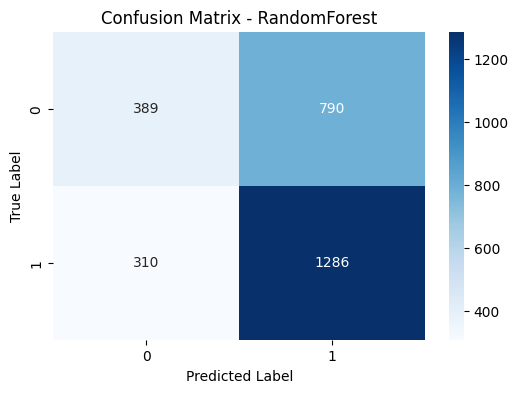

In [ ]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - RandomForest")
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


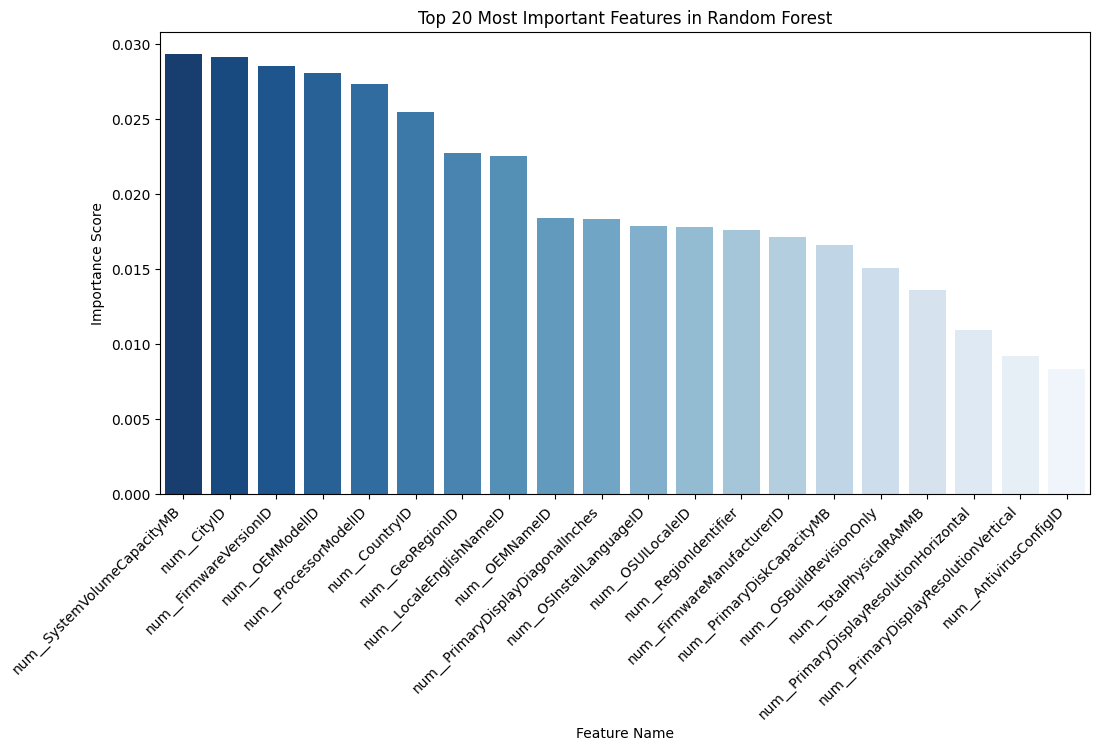

In [ ]:
rf = pipeline.named_steps['classifier']
importances = rf.feature_importances_

# Get feature names after OneHotEncoding
feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()

# Sort features by importance
indices = np.argsort(importances)[::-1]
top_n = 20  # Select top 20 features
top_indices = indices[:top_n]

# Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x=[feature_names[i] for i in top_indices], y=importances[top_indices], palette="Blues_r")
plt.xticks(rotation=45, ha="right")  # Rotate for better visibility
plt.xlabel("Feature Name")
plt.ylabel("Importance Score")
plt.title(f"Top {top_n} Most Important Features in Random Forest")
plt.show()


**Understanding the most important feature**:
feature importance plot provides valuable insights into which features contribute most to the predictions made by your Random Forest model.

* Most Important Features:

  The top-ranked features have the highest impact on predictions.
  For example, SystemVolumeCapacityMB, CityID, and FirmwareVersionID are the most influential features in determining the target variable.

* Feature Relevance:

  Features with higher importance scores significantly influence the model’s decision-making.
  Features at the lower end (e.g., DateOS_5_month, TotalPhysicalRAMMB) have less impact but still contribute.

* Domain Insights:

  If this is a system threat forecasting problem, hardware configurations (SystemVolumeCapacityMB, RAM_Disk_Interaction, ProcessorModelID)    could be strong indicators of vulnerability or risk.
  Geographical features (CityID, GeoRegionID) may indicate regional trends in system threats.
  Software attributes (OSInstallLanguageID, FirmwareVersionID, OSBuildRevisionOnly) may be linked to operating system vulnerabilities.

* Feature Engineering Insights:

  This might consider removing features with very low importance to simplify the model.
  If a feature is highly important, you could explore it further, engineer new related features, or analyze its correlation with the target   variable.


**Hyperparameter Tuning of The Model**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define the parameter grid
param_dist = {
    'classifier__n_estimators': [100, 300, 500, 700],  # Number of trees
    'classifier__max_depth': [None, 10, 20, 30],       # Max depth of trees
    'classifier__min_samples_split': [2, 5, 10],       # Minimum samples to split a node
    'classifier__min_samples_leaf': [1, 2, 4],         # Minimum samples in a leaf node
    'classifier__bootstrap': [True, False]             # Use bootstrap samples
}

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(
    pipeline, param_distributions=param_dist,
    n_iter=10,  # Number of combinations to test
    cv=3,  # 3-fold cross-validation
    verbose=2,  # Print progress
    n_jobs=-1,  # Use all CPUs
    random_state=42
)

# Fit the model
random_search.fit(X_train, y_train)

# Best hyperparameters
print("Best hyperparameters:", random_search.best_params_)

# Evaluate on test set
y_pred_optimized = random_search.best_estimator_.predict(X_test)
accuracy_optimized = accuracy_score(y_test, y_pred_optimized)
print(f"Optimized Model Accuracy: {accuracy_optimized:.4f}")
print(classification_report(y_test, y_pred_optimized))


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best hyperparameters: {'classifier__n_estimators': 300, 'classifier__min_samples_split': 10, 'classifier__min_samples_leaf': 1, 'classifier__max_depth': None, 'classifier__bootstrap': True}
Optimized Model Accuracy: 0.6083
              precision    recall  f1-score   support

         0.0       0.58      0.28      0.38      1179
         1.0       0.62      0.85      0.71      1596

    accuracy                           0.61      2775
   macro avg       0.60      0.57      0.55      2775
weighted avg       0.60      0.61      0.57      2775



**Understanding the Optimized Model Results**

  RandomizedSearchCV tuning improved the Random Forest model slightly.

  Small Accuracy Improvement:

  Tuning improved accuracy from 60.36% to 60.83%, meaning the model generalizes slightly better.
  
  Class Imbalance Issue Persists:

  Class 1 (positive) is detected well (85% recall), but class 0 (negative) is poorly detected (28% recall).
  The model is biased towards predicting class 1, leading to low recall for class 0.
  
  Overfitting Reduced Slightly:

  Using min_samples_split=10 prevents overly deep trees.
  


**Handle Class Imbalance**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

best_rf = RandomForestClassifier(
    n_estimators=300,
    min_samples_split=10,
    min_samples_leaf=1,
    max_depth=None,
    bootstrap=True,
    class_weight="balanced",
    random_state=42
)

# Update pipeline with best model
pipeline.set_params(classifier=best_rf)

# Train again
pipeline.fit(X_train, y_train)

# Predict & evaluate
y_pred_balanced = pipeline.predict(X_test)
accuracy_balanced = accuracy_score(y_test, y_pred_balanced)
print(f"Balanced Model Accuracy: {accuracy_balanced:.4f}")
print(classification_report(y_test, y_pred_balanced))


Balanced Model Accuracy: 0.5921
              precision    recall  f1-score   support

         0.0       0.52      0.42      0.47      1179
         1.0       0.63      0.72      0.67      1596

    accuracy                           0.59      2775
   macro avg       0.58      0.57      0.57      2775
weighted avg       0.58      0.59      0.58      2775



**XGB MODEL**

In [ ]:
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
# Train-test split (again, in case of any changes)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Define preprocessing for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), X_train.select_dtypes(include=['float64', 'int64']).columns),
        ('cat', OneHotEncoder(handle_unknown='ignore'), X_train.select_dtypes(include=['object']).columns)
    ]
)

# Define XGBoost model
xgb_model = XGBClassifier(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=1,  # Adjust this if class imbalance is still an issue
    random_state=42,
    use_label_encoder=False,
    eval_metric="logloss"  # Avoids warning messages
)

# Create pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', xgb_model)
])

# Train the pipeline
pipeline.fit(X_train, y_train)

# Make predictions
y_pred_xgb = pipeline.predict(X_test)

# Evaluate performance
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Model Accuracy: {accuracy_xgb:.4f}")
print(classification_report(y_test, y_pred_xgb))


XGBoost Model Accuracy: 0.6094
              precision    recall  f1-score   support

         0.0       0.56      0.39      0.46      1179
         1.0       0.63      0.77      0.69      1596

    accuracy                           0.61      2775
   macro avg       0.59      0.58      0.58      2775
weighted avg       0.60      0.61      0.59      2775



In [ ]:
submission = pd.DataFrame({'Id': X_test.index, 'Predicted': y_pred_xgb})


submission.to_csv('submission.csv', index=False)
print("Submission file saved as 'submission.csv'")


Submission file saved as 'submission.csv'
